In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
%matplotlib inline

## 데이터베이스 연동하기

In [3]:
import cx_Oracle
import os
LOCATION = r"C:\instantclient_21_6"
os.environ["PATH"] = LOCATION + ";" + os.environ["PATH"]

connect = cx_Oracle.connect("사용자이름", "비밀번호", "호스트이름:포트/서비스이름")

In [4]:
connect = cx_Oracle.connect("system", "Passion6926!", "localhost:1521/system")
cursor = connect.cursor()

In [5]:
cursor.execute("select * from lpay_demo where cust='M000034966' ")

for i in cursor:
    print(i)

('M000034966', '여성', '40대', 'Z07')


In [8]:
#DataFrame으로 불러오기

df=pd.read_sql("select * from lpay_demo where cust='M000034966' " , con = connect)

C:\Users\passion\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [7]:
df

,CUST,MA_FEM_DV,AGES,ZON_HLV
0,M000034966,여성,40대,Z07


## 원하는 데이터프레임 불러오기

데이터 베이스에 넣는거까지 성공을 했고 앞으로는 데이터를 데이터베이스로부터 불러오겠다<br>
LPOINT_BIG_COMP_01_DEMO.csv  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; >> LPAY_DEMO <br>
LPOINT_BIG_COMP_02_PDDE.csv  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;>> LPAY_PDDE <br>
LPOINT_BIG_COMP_03_COP_U.csv  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;>> LPAY_COP_U <br>
LPOINT_BIG_COMP_04_PD_CLAC.csv  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;>> LPAY_PD_CLAC <br>
LPOINT_BIG_COMP_05_BR.csv  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;>> LPAY_BR <br>
LPOINT_BIG_COMP/LPOINT_BIG_COMP_06_LPAY.csv  &nbsp; &nbsp;>> LPAY_LPAY 

### PDDE DF

In [8]:
PDDE_DF = pd.DataFrame([])
for chunk in pd.read_sql("select B.cust, A.ma_fem_dv , A.ages, A.zon_hlv, B.de_hr, B.buy_am, B.cop_c, B.chnl_dv, B.de_dt, B.pd_c, B.buy_ct, C.zon_hlv, D. CLAC_HLV_NM, D.CLAC_MCLS_NM, D.PD_NM from  LPAY_PDDE B left outer join LPAY_BR C  on B.br_c=C.br_c left outer join LPAY_DEMO A  on A.cust = B.cust left outer join LPAY_PD_CLAC D on B.PD_C = D.PD_C", con= connect, chunksize=1000000):
    PDDE_DF = PDDE_DF.append(chunk)
PDDE_DF.head()

,CUST,MA_FEM_DV,AGES,ZON_HLV,DE_HR,BUY_AM,COP_C,CHNL_DV,DE_DT,PD_C,BUY_CT,ZON_HLV,CLAC_HLV_NM,CLAC_MCLS_NM,PD_NM
0,M430112881,여성,50대,Z17,10,15000,A01,1,20210101,PD0290,1,Z10,남성의류,남성의류상의,남성티셔츠
1,M646853852,여성,40대,Z13,10,79700,A01,1,20210101,PD1369,1,Z13,주방잡화,주방일회용품,기타주방일회용품
2,M430112881,여성,50대,Z17,10,19000,A01,1,20210101,PD0290,1,Z10,남성의류,남성의류상의,남성티셔츠
3,M430112881,여성,50대,Z17,10,19000,A01,1,20210101,PD0290,1,Z10,남성의류,남성의류상의,남성티셔츠
4,M430112881,여성,50대,Z17,10,19000,A01,1,20210101,PD0290,1,Z10,남성의류,남성의류상의,남성티셔츠


In [9]:
PDDE_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4381743 entries, 0 to 381742
Data columns (total 15 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   CUST          object
 1   MA_FEM_DV     object
 2   AGES          object
 3   ZON_HLV       object
 4   DE_HR         int64 
 5   BUY_AM        int64 
 6   COP_C         object
 7   CHNL_DV       int64 
 8   DE_DT         int64 
 9   PD_C          object
 10  BUY_CT        int64 
 11  ZON_HLV       object
 12  CLAC_HLV_NM   object
 13  CLAC_MCLS_NM  object
 14  PD_NM         object
dtypes: int64(5), object(10)
memory usage: 534.9+ MB


### COP_U DF

In [10]:
COP_U_DF = pd.DataFrame([])
for chunk in pd.read_sql("select B.cust, A.ma_fem_dv , A.ages, A.zon_hlv, B.de_hr, B.buy_am, B.cop_c, B.chnl_dv, B.de_dt, C.zon_hlv from LPAY_DEMO A, LPAY_COP_U B, LPAY_BR C where A.cust = B.cust AND B.br_c = C.br_c ", con= connect, chunksize=1000000):
    COP_U_DF = COP_U_DF.append(chunk)
COP_U_DF.head()

,CUST,MA_FEM_DV,AGES,ZON_HLV,DE_HR,BUY_AM,COP_C,CHNL_DV,DE_DT,ZON_HLV
0,M839993508,남성,70대,Z17,12,60000,B01,1,20211026,Z17
1,M839993508,남성,70대,Z17,10,17100,B01,1,20211106,Z17
2,M839993508,남성,70대,Z17,12,136500,B01,1,20210211,Z17
3,M839993508,남성,70대,Z17,10,34200,B01,1,20210920,Z17
4,M839993508,남성,70대,Z17,9,2500,D01,1,20211010,Z17


### LPAY DF

In [11]:
LPAY_DF = pd.DataFrame([])
for chunk in pd.read_sql("select B.cust, A.ma_fem_dv , A.ages, A.zon_hlv, B.de_hr, B.buy_am, B.cop_c, B.chnl_dv, B.de_dt from LPAY_DEMO A, LPAY_LPAY B where A.cust = B.cust ", con= connect, chunksize=1000000):
    LPAY_DF = LPAY_DF.append(chunk)
LPAY_DF.head()

,CUST,MA_FEM_DV,AGES,ZON_HLV,DE_HR,BUY_AM,COP_C,CHNL_DV,DE_DT
0,M629656521,남성,40대,Z04,21,10900,A03,1,20210803
1,M216016456,여성,40대,Z04,13,6860,L01,2,20210803
2,M205142844,여성,60대,Z17,14,9000,A02,1,20210803
3,M737010483,남성,40대,Z16,4,36740,A06,2,20210803
4,M707775545,남성,30대,Z11,14,138500,A06,2,20210803


## 데이터 concat 하기

### COP_U_DF 데이터프레임 만들기

In [12]:
COP_U_DF['PD_C'] = 4000
COP_U_DF['BUY_CT'] = 0
COP_U_DF['CLAC_HLV_NM'] = 'NULL'
COP_U_DF['CLAC_MCLS_NM'] = 'NULL'
COP_U_DF['PD_NM'] = 'NULL'
COP_U_DF['LPAY_USE'] = 0
col_list = list(COP_U_DF.columns)
col_list[3] = 'C_ZON_HLV'
COP_U_DF.columns = col_list
COP_U_DF = COP_U_DF.rename(columns = {'ZON_HLV' : 'S_ZON_HLV'})
COP_U_DF = COP_U_DF[['CUST', 'MA_FEM_DV', 'AGES', 'C_ZON_HLV', 'DE_HR', 'BUY_AM', 'COP_C', 'CHNL_DV', 'DE_DT', 'PD_C', 'BUY_CT', 'S_ZON_HLV','CLAC_HLV_NM','CLAC_MCLS_NM','PD_NM','LPAY_USE']]
COP_U_DF.head()

,CUST,MA_FEM_DV,AGES,C_ZON_HLV,DE_HR,BUY_AM,COP_C,CHNL_DV,DE_DT,PD_C,BUY_CT,S_ZON_HLV,CLAC_HLV_NM,CLAC_MCLS_NM,PD_NM,LPAY_USE
0,M839993508,남성,70대,Z17,12,60000,B01,1,20211026,4000,0,Z17,NULL,NULL,NULL,0
1,M839993508,남성,70대,Z17,10,17100,B01,1,20211106,4000,0,Z17,NULL,NULL,NULL,0
2,M839993508,남성,70대,Z17,12,136500,B01,1,20210211,4000,0,Z17,NULL,NULL,NULL,0
3,M839993508,남성,70대,Z17,10,34200,B01,1,20210920,4000,0,Z17,NULL,NULL,NULL,0
4,M839993508,남성,70대,Z17,9,2500,D01,1,20211010,4000,0,Z17,NULL,NULL,NULL,0


### LPAY_DF 데이터 프레임 만들기

In [13]:
LPAY_DF = LPAY_DF.rename(columns = {'ZON_HLV' : 'C_ZON_HLV'})
LPAY_DF['PD_C'] = 6000
LPAY_DF['BUY_CT'] = 0
LPAY_DF['CLAC_HLV_NM'] = 'NULL'
LPAY_DF['CLAC_MCLS_NM'] = 'NULL'
LPAY_DF['PD_NM'] = 'NULL'
LPAY_DF['LPAY_USE'] = 1
LPAY_DF['S_ZON_HLV'] = 'Z00' # 결측치 Z00으로 대체
LPAY_DF = LPAY_DF[['CUST', 'MA_FEM_DV', 'AGES', 'C_ZON_HLV', 'DE_HR', 'BUY_AM', 'COP_C', 'CHNL_DV', 'DE_DT', 'PD_C', 'BUY_CT', 'S_ZON_HLV','CLAC_HLV_NM','CLAC_MCLS_NM','PD_NM', 'LPAY_USE']]
LPAY_DF.head()

,CUST,MA_FEM_DV,AGES,C_ZON_HLV,DE_HR,BUY_AM,COP_C,CHNL_DV,DE_DT,PD_C,BUY_CT,S_ZON_HLV,CLAC_HLV_NM,CLAC_MCLS_NM,PD_NM,LPAY_USE
0,M629656521,남성,40대,Z04,21,10900,A03,1,20210803,6000,0,Z00,NULL,NULL,NULL,1
1,M216016456,여성,40대,Z04,13,6860,L01,2,20210803,6000,0,Z00,NULL,NULL,NULL,1
2,M205142844,여성,60대,Z17,14,9000,A02,1,20210803,6000,0,Z00,NULL,NULL,NULL,1
3,M737010483,남성,40대,Z16,4,36740,A06,2,20210803,6000,0,Z00,NULL,NULL,NULL,1
4,M707775545,남성,30대,Z11,14,138500,A06,2,20210803,6000,0,Z00,NULL,NULL,NULL,1


### PDDE_DF 데이터 프레임만들기

In [14]:
col_list = list(PDDE_DF.columns)
col_list[3] = 'C_ZON_HLV'
PDDE_DF.columns = col_list
PDDE_DF = PDDE_DF.rename(columns = {'ZON_HLV' : 'S_ZON_HLV'})
PDDE_DF["PD_C"]=PDDE_DF["PD_C"].str.replace("PD","")
PDDE_DF['S_ZON_HLV'] = PDDE_DF['S_ZON_HLV'].fillna('Z00') # 결측치 Z00으로 대체
PDDE_DF['LPAY_USE'] = 0
PDDE_DF.head()

,CUST,MA_FEM_DV,AGES,C_ZON_HLV,DE_HR,BUY_AM,COP_C,CHNL_DV,DE_DT,PD_C,BUY_CT,S_ZON_HLV,CLAC_HLV_NM,CLAC_MCLS_NM,PD_NM,LPAY_USE
0,M430112881,여성,50대,Z17,10,15000,A01,1,20210101,0290,1,Z10,남성의류,남성의류상의,남성티셔츠,0
1,M646853852,여성,40대,Z13,10,79700,A01,1,20210101,1369,1,Z13,주방잡화,주방일회용품,기타주방일회용품,0
2,M430112881,여성,50대,Z17,10,19000,A01,1,20210101,0290,1,Z10,남성의류,남성의류상의,남성티셔츠,0
3,M430112881,여성,50대,Z17,10,19000,A01,1,20210101,0290,1,Z10,남성의류,남성의류상의,남성티셔츠,0
4,M430112881,여성,50대,Z17,10,19000,A01,1,20210101,0290,1,Z10,남성의류,남성의류상의,남성티셔츠,0


### 3개의 데이터프레임 하나로 합치기

In [15]:
result1 = pd.concat([PDDE_DF,COP_U_DF])
result1

,CUST,MA_FEM_DV,AGES,C_ZON_HLV,DE_HR,BUY_AM,COP_C,CHNL_DV,DE_DT,PD_C,BUY_CT,S_ZON_HLV,CLAC_HLV_NM,CLAC_MCLS_NM,PD_NM,LPAY_USE
0,M430112881,여성,50대,Z17,10,15000,A01,1,20210101,0290,1,Z10,남성의류,남성의류상의,남성티셔츠,0
1,M646853852,여성,40대,Z13,10,79700,A01,1,20210101,1369,1,Z13,주방잡화,주방일회용품,기타주방일회용품,0
2,M430112881,여성,50대,Z17,10,19000,A01,1,20210101,0290,1,Z10,남성의류,남성의류상의,남성티셔츠,0
3,M430112881,여성,50대,Z17,10,19000,A01,1,20210101,0290,1,Z10,남성의류,남성의류상의,남성티셔츠,0
4,M430112881,여성,50대,Z17,10,19000,A01,1,20210101,0290,1,Z10,남성의류,남성의류상의,남성티셔츠,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248244,M058650684,여성,20대,Z10,14,2000,C02,1,20211116,4000,0,Z17,NULL,NULL,NULL,0
248245,M058650684,여성,20대,Z10,19,26900,C02,1,20211116,4000,0,Z17,NULL,NULL,NULL,0
248246,M014154595,여성,30대,Z12,9,2000,C01,2,20211212,4000,0,Z14,NULL,NULL,NULL,0
248247,M510878172,남성,20대,Z17,19,6000,C01,2,20211127,4000,0,Z17,NULL,NULL,NULL,0


In [16]:
result = pd.concat([result1,LPAY_DF])
result

,CUST,MA_FEM_DV,AGES,C_ZON_HLV,DE_HR,BUY_AM,COP_C,CHNL_DV,DE_DT,PD_C,BUY_CT,S_ZON_HLV,CLAC_HLV_NM,CLAC_MCLS_NM,PD_NM,LPAY_USE
0,M430112881,여성,50대,Z17,10,15000,A01,1,20210101,0290,1,Z10,남성의류,남성의류상의,남성티셔츠,0
1,M646853852,여성,40대,Z13,10,79700,A01,1,20210101,1369,1,Z13,주방잡화,주방일회용품,기타주방일회용품,0
2,M430112881,여성,50대,Z17,10,19000,A01,1,20210101,0290,1,Z10,남성의류,남성의류상의,남성티셔츠,0
3,M430112881,여성,50대,Z17,10,19000,A01,1,20210101,0290,1,Z10,남성의류,남성의류상의,남성티셔츠,0
4,M430112881,여성,50대,Z17,10,19000,A01,1,20210101,0290,1,Z10,남성의류,남성의류상의,남성티셔츠,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353179,M470112503,여성,50대,Z16,11,51800,A06,2,20210125,6000,0,Z00,NULL,NULL,NULL,1
353180,M470112503,여성,50대,Z16,21,6440,A06,2,20210104,6000,0,Z00,NULL,NULL,NULL,1
353181,M748878049,여성,30대,Z10,20,17600,A02,1,20210119,6000,0,Z00,NULL,NULL,NULL,1
353182,M748878049,여성,30대,Z10,18,12400,A02,1,20210119,6000,0,Z00,NULL,NULL,NULL,1


In [17]:
result.loc[result['MA_FEM_DV'] == '남성', 'MA_FEM_DV'] = 1
## 남자를 1로 변경
result.loc[result['MA_FEM_DV'] == '여성', 'MA_FEM_DV'] = 0
## 여자를 0으로 변경
result.head()

,CUST,MA_FEM_DV,AGES,C_ZON_HLV,DE_HR,BUY_AM,COP_C,CHNL_DV,DE_DT,PD_C,BUY_CT,S_ZON_HLV,CLAC_HLV_NM,CLAC_MCLS_NM,PD_NM,LPAY_USE
0,M430112881,0,50대,Z17,10,15000,A01,1,20210101,0290,1,Z10,남성의류,남성의류상의,남성티셔츠,0
1,M646853852,0,40대,Z13,10,79700,A01,1,20210101,1369,1,Z13,주방잡화,주방일회용품,기타주방일회용품,0
2,M430112881,0,50대,Z17,10,19000,A01,1,20210101,0290,1,Z10,남성의류,남성의류상의,남성티셔츠,0
3,M430112881,0,50대,Z17,10,19000,A01,1,20210101,0290,1,Z10,남성의류,남성의류상의,남성티셔츠,0
4,M430112881,0,50대,Z17,10,19000,A01,1,20210101,0290,1,Z10,남성의류,남성의류상의,남성티셔츠,0


In [18]:
result = result.replace({'AGES' : '20대'}, 20)
result = result.replace({'AGES' : '30대'}, 30)
result = result.replace({'AGES' : '40대'}, 40)
result = result.replace({'AGES' : '50대'}, 50)
result = result.replace({'AGES' : '60대'}, 60)
result = result.replace({'AGES' : '70대'}, 70)
##대를 삭제
result.head()

,CUST,MA_FEM_DV,AGES,C_ZON_HLV,DE_HR,BUY_AM,COP_C,CHNL_DV,DE_DT,PD_C,BUY_CT,S_ZON_HLV,CLAC_HLV_NM,CLAC_MCLS_NM,PD_NM,LPAY_USE
0,M430112881,0,50,Z17,10,15000,A01,1,20210101,0290,1,Z10,남성의류,남성의류상의,남성티셔츠,0
1,M646853852,0,40,Z13,10,79700,A01,1,20210101,1369,1,Z13,주방잡화,주방일회용품,기타주방일회용품,0
2,M430112881,0,50,Z17,10,19000,A01,1,20210101,0290,1,Z10,남성의류,남성의류상의,남성티셔츠,0
3,M430112881,0,50,Z17,10,19000,A01,1,20210101,0290,1,Z10,남성의류,남성의류상의,남성티셔츠,0
4,M430112881,0,50,Z17,10,19000,A01,1,20210101,0290,1,Z10,남성의류,남성의류상의,남성티셔츠,0


In [19]:
result['DE_DT']= result['DE_DT'].astype('str')
result['DE_DT']= pd.to_datetime(result['DE_DT'])
#데이터를 datetime data형태로 변환

In [20]:
import datetime

result['YEAR'] = result['DE_DT'].dt.year 
result['MONTH'] = result['DE_DT'].dt.month 
result['DATE'] = result['DE_DT'].dt.day
result['DAY'] = result['DE_DT'].dt.dayofweek# 0-월 6-일


In [21]:
result = result[['CUST', 'MA_FEM_DV', 'AGES', 'C_ZON_HLV', 'BUY_AM', 'COP_C',
       'CHNL_DV','DE_DT', 'PD_C', 'BUY_CT', 'S_ZON_HLV', 'MONTH', 'DATE','DAY','DE_HR','CLAC_HLV_NM', 'CLAC_MCLS_NM','PD_NM','LPAY_USE']]
result["C_ZON_HLV"]=result["C_ZON_HLV"].str.replace("Z","")
result["S_ZON_HLV"]=result["S_ZON_HLV"].str.replace("Z","")

result.head()

,CUST,MA_FEM_DV,AGES,C_ZON_HLV,BUY_AM,COP_C,CHNL_DV,DE_DT,PD_C,BUY_CT,S_ZON_HLV,MONTH,DATE,DAY,DE_HR,CLAC_HLV_NM,CLAC_MCLS_NM,PD_NM,LPAY_USE
0,M430112881,0,50,17,15000,A01,1,2021-01-01,0290,1,10,1,1,4,10,남성의류,남성의류상의,남성티셔츠,0
1,M646853852,0,40,13,79700,A01,1,2021-01-01,1369,1,13,1,1,4,10,주방잡화,주방일회용품,기타주방일회용품,0
2,M430112881,0,50,17,19000,A01,1,2021-01-01,0290,1,10,1,1,4,10,남성의류,남성의류상의,남성티셔츠,0
3,M430112881,0,50,17,19000,A01,1,2021-01-01,0290,1,10,1,1,4,10,남성의류,남성의류상의,남성티셔츠,0
4,M430112881,0,50,17,19000,A01,1,2021-01-01,0290,1,10,1,1,4,10,남성의류,남성의류상의,남성티셔츠,0


result 값 int 로 바꾸기

In [22]:
result= result.astype({'MA_FEM_DV':'int'})
result=result.astype({'C_ZON_HLV':'int'})
result=result.astype({'PD_C':'int'})
result=result.astype({'S_ZON_HLV':'int'})
result=result.astype({'DE_DT':'str'})

In [23]:
change = {'COP_C' : {"A01":110, "A02":120, "A03":130, "A04":140, "A05":150, "A06":160,"B01":210,"C01":310,"C02":320,"D01":410,"D02":420,"E01":510,"L00":600,"L01":610}}
result = result.replace(change)

In [24]:
result=result.astype({'COP_C':'int'})

In [25]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4983176 entries, 0 to 353183
Data columns (total 19 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   CUST          object
 1   MA_FEM_DV     int32 
 2   AGES          int64 
 3   C_ZON_HLV     int32 
 4   BUY_AM        int64 
 5   COP_C         int32 
 6   CHNL_DV       int64 
 7   DE_DT         object
 8   PD_C          int32 
 9   BUY_CT        int64 
 10  S_ZON_HLV     int32 
 11  MONTH         int64 
 12  DATE          int64 
 13  DAY           int64 
 14  DE_HR         int64 
 15  CLAC_HLV_NM   object
 16  CLAC_MCLS_NM  object
 17  PD_NM         object
 18  LPAY_USE      int64 
dtypes: int32(5), int64(9), object(5)
memory usage: 665.3+ MB


In [28]:
result

,CUST,MA_FEM_DV,AGES,C_ZON_HLV,BUY_AM,COP_C,CHNL_DV,DE_DT,PD_C,BUY_CT,S_ZON_HLV,MONTH,DATE,DAY,DE_HR,CLAC_HLV_NM,CLAC_MCLS_NM,PD_NM,LPAY_USE
0,M430112881,0,50,17,15000,110,1,2021-01-01,290,1,10,1,1,4,10,남성의류,남성의류상의,남성티셔츠,0
1,M646853852,0,40,13,79700,110,1,2021-01-01,1369,1,13,1,1,4,10,주방잡화,주방일회용품,기타주방일회용품,0
2,M430112881,0,50,17,19000,110,1,2021-01-01,290,1,10,1,1,4,10,남성의류,남성의류상의,남성티셔츠,0
3,M430112881,0,50,17,19000,110,1,2021-01-01,290,1,10,1,1,4,10,남성의류,남성의류상의,남성티셔츠,0
4,M430112881,0,50,17,19000,110,1,2021-01-01,290,1,10,1,1,4,10,남성의류,남성의류상의,남성티셔츠,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353179,M470112503,0,50,16,51800,160,2,2021-01-25,6000,0,0,1,25,0,11,NULL,NULL,NULL,1
353180,M470112503,0,50,16,6440,160,2,2021-01-04,6000,0,0,1,4,0,21,NULL,NULL,NULL,1
353181,M748878049,0,30,10,17600,120,1,2021-01-19,6000,0,0,1,19,1,20,NULL,NULL,NULL,1
353182,M748878049,0,30,10,12400,120,1,2021-01-19,6000,0,0,1,19,1,18,NULL,NULL,NULL,1


# 구매금액(buy_am) visualization

In [29]:
buy_am = result[[ 'CUST','MA_FEM_DV', 'AGES', 'C_ZON_HLV', 'BUY_AM','DE_DT', 'CHNL_DV','LPAY_USE']]

In [30]:
buy_am

,CUST,MA_FEM_DV,AGES,C_ZON_HLV,BUY_AM,DE_DT,CHNL_DV,LPAY_USE
0,M430112881,0,50,17,15000,2021-01-01,1,0
1,M646853852,0,40,13,79700,2021-01-01,1,0
2,M430112881,0,50,17,19000,2021-01-01,1,0
3,M430112881,0,50,17,19000,2021-01-01,1,0
4,M430112881,0,50,17,19000,2021-01-01,1,0
...,...,...,...,...,...,...,...,...
353179,M470112503,0,50,16,51800,2021-01-25,2,1
353180,M470112503,0,50,16,6440,2021-01-04,2,1
353181,M748878049,0,30,10,17600,2021-01-19,1,1
353182,M748878049,0,30,10,12400,2021-01-19,1,1


일단 lpay쓰는사람 안쓰는 사람 데이터를 나눈다.

In [31]:
buy_am_lpay_no= buy_am[buy_am['LPAY_USE']==0]
buy_am_lpay_yes= buy_am[buy_am['LPAY_USE']==1]
buy_am_lpay_no

,CUST,MA_FEM_DV,AGES,C_ZON_HLV,BUY_AM,DE_DT,CHNL_DV,LPAY_USE
0,M430112881,0,50,17,15000,2021-01-01,1,0
1,M646853852,0,40,13,79700,2021-01-01,1,0
2,M430112881,0,50,17,19000,2021-01-01,1,0
3,M430112881,0,50,17,19000,2021-01-01,1,0
4,M430112881,0,50,17,19000,2021-01-01,1,0
...,...,...,...,...,...,...,...,...
248244,M058650684,0,20,10,2000,2021-11-16,1,0
248245,M058650684,0,20,10,26900,2021-11-16,1,0
248246,M014154595,0,30,12,2000,2021-12-12,2,0
248247,M510878172,1,20,17,6000,2021-11-27,2,0


In [32]:
buy_am_lpay_no = pd.pivot_table(buy_am_lpay_no, index = ['CUST','DE_DT', 'CHNL_DV']
               ,values = ['AGES', 'C_ZON_HLV','MA_FEM_DV','BUY_AM'] 
               ,aggfunc = {'AGES':np.mean,'C_ZON_HLV':np.mean,'MA_FEM_DV':np.mean,'BUY_AM':np.sum})
buy_am_lpay_yes = pd.pivot_table(buy_am_lpay_yes, index = ['CUST','DE_DT', 'CHNL_DV']
               ,values = ['AGES', 'C_ZON_HLV','MA_FEM_DV','BUY_AM'] 
               ,aggfunc = {'AGES':np.mean,'C_ZON_HLV':np.mean,'MA_FEM_DV':np.mean,'BUY_AM':np.sum})

In [33]:
buy_am_lpay_no = buy_am_lpay_no.reset_index()
buy_am_lpay_yes = buy_am_lpay_yes.reset_index()

## 나이와 성별에 따른 구매금액

### 나이와 성별에 따른 구매금액 총합산금액

나이별 사람들의 성별에 따른 금액 총 합산을 보겠다

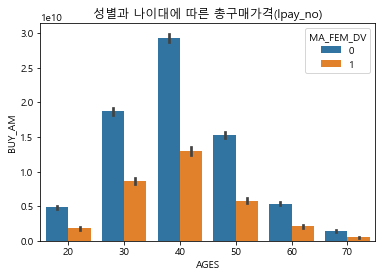

In [37]:
sns.barplot(x="AGES", y="BUY_AM", hue="MA_FEM_DV", data=buy_am_lpay_no, estimator=sum)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("성별과 나이대에 따른 총구매가격(lpay_no)")
plt.show()

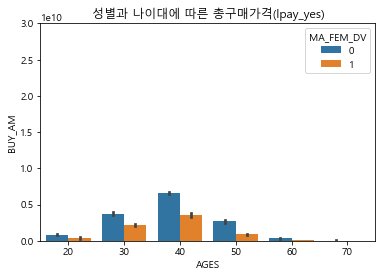

In [36]:
sns.barplot(x="AGES", y="BUY_AM", hue="MA_FEM_DV", data=buy_am_lpay_yes, estimator=sum)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("성별과 나이대에 따른 총구매가격(lpay_yes)")
plt.ylim([0, 30000000000]) 
plt.show()

### 나이와 성별에 따른 구매금액 평균금액

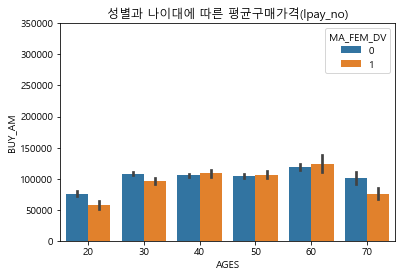

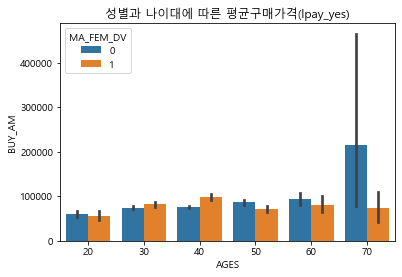

In [38]:
sns.barplot(x="AGES", y="BUY_AM", hue="MA_FEM_DV", data=buy_am_lpay_no)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("성별과 나이대에 따른 평균구매가격(lpay_no)")
plt.ylim([0, 350000]) 
plt.show()
sns.barplot(x="AGES", y="BUY_AM", hue="MA_FEM_DV", data=buy_am_lpay_yes)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("성별과 나이대에 따른 평균구매가격(lpay_yes)")
plt.show()

위의 그래프를 보고 도출한 여러가지 insight들<br>
1. lpay를 쓰든 lpay를 안쓰든 40대의 총 구매 가격이 훨씬 많다 >> 마케팅을 40대를 기준으로 하면 괜춘할수도
2. 평균가격은 비슷한거보면 40대들이 비싼걸 많이 사는게 아닌 40대들의 손님들이 많이와서 많이 산다고 봐야한다(보류)
3. 특이한게 lpay를 쓰는 70대에서 평균 구매가격이 확 뛴다 >> 결측치이거나 엄청 큰손일 가능성이 존재
4. 품목 하나하나의 기준으로 평균 구매가격을 보면 lpay를 쓰는 사람들이 안쓰는 사람들보다 훨씬 더 비싸게 사는 경향이 있다.

그래서 70대이고 돈을 많이쓰는 lpay 사람들을 따로 찍어보았다.

In [46]:
a = buy_am['BUY_AM']>200000
b = buy_am['LPAY_USE']==1
c = buy_am['AGES']==70
buy_am[a&b&c]

,MA_FEM_DV,AGES,C_ZON_HLV,BUY_AM,CHNL_DV,LPAY_USE
9484,0,70,10,223200,1,1
10674,0,70,10,218550,1,1
24147,1,70,10,227070,2,1
24148,1,70,10,227070,2,1
56461,0,70,15,1110000,2,1
61905,1,70,10,1630000,2,1
72255,0,70,17,200200,1,1
72257,0,70,17,398000,1,1
76692,0,70,17,15001500,1,1
76693,0,70,17,3000990,1,1


1500만원을 flex한 할머니가 있다.

## 거주지에 따른 구매 금액

### 거주지에 따른 구매 총합산금액

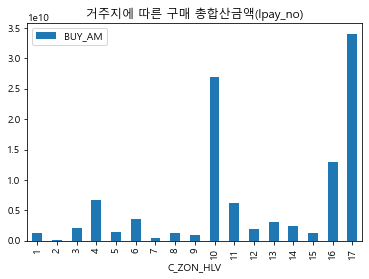

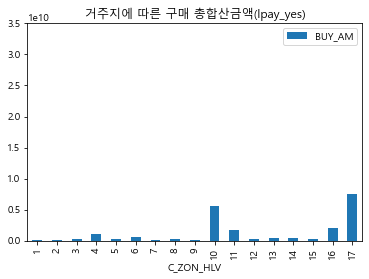

In [55]:
zon_buy_am = buy_am_lpay_no[['C_ZON_HLV','BUY_AM']]
zon_buy_am = zon_buy_am.groupby('C_ZON_HLV').sum()
zon_buy_am.plot.bar()
plt.title("거주지에 따른 구매 총합산금액(lpay_no)")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()
zon_buy_am = buy_am_lpay_yes[['C_ZON_HLV','BUY_AM']]
zon_buy_am = zon_buy_am.groupby('C_ZON_HLV').sum()
zon_buy_am.plot.bar()
plt.ylim([0, 35000000000]) 
plt.title("거주지에 따른 구매 총합산금액(lpay_yes)")
plt.show()

### 거주지에 따른 구매 평균 금액

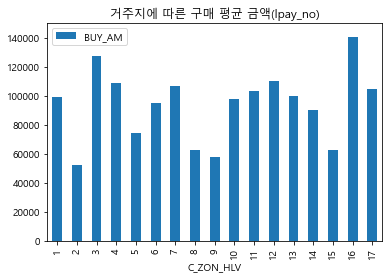

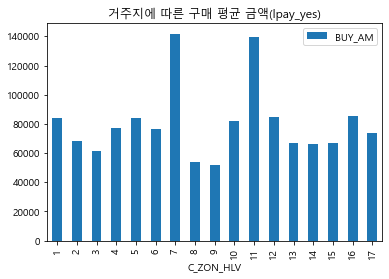

In [42]:
zon_buy_am = buy_am_lpay_no[['C_ZON_HLV','BUY_AM']]
zon_buy_am = zon_buy_am.groupby('C_ZON_HLV').mean()
zon_buy_am.plot.bar()
plt.ylim([0, 150000]) 
plt.title("거주지에 따른 구매 평균 금액(lpay_no)")
plt.show()
zon_buy_am = buy_am_lpay_yes[['C_ZON_HLV','BUY_AM']]
zon_buy_am = zon_buy_am.groupby('C_ZON_HLV').mean()
zon_buy_am.plot.bar()
plt.title("거주지에 따른 구매 평균 금액(lpay_yes)")
plt.show()

17 지역과 10 지역에 사는 사람들이 총구매비용이 더 높다<br>
평균 구매비용이 그렇게 차이나는건 아니라고 판단하기때문에 10 지역과 17지역에 사람들이 더 많이 산다고 판단<br>
이 지역 사람들의 구매 패턴이나 그런걸 파악해서 마케팅 전략 세워도 괜찮을거 같다.

## 온라인 오프라인 사람들의 구매금액

### 온라인 오프라인 사람들의 총 합산 금액

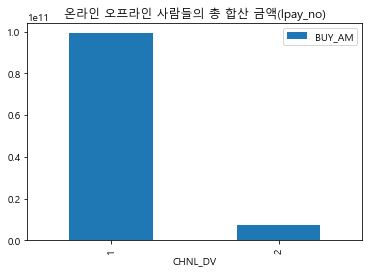

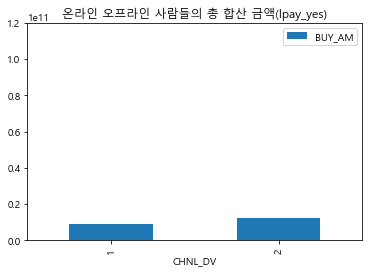

In [58]:
zon_buy_am = buy_am_lpay_no[['CHNL_DV','BUY_AM']]
zon_buy_am = zon_buy_am.groupby('CHNL_DV').sum()
zon_buy_am.plot.bar()
plt.title("온라인 오프라인 사람들의 총 합산 금액(lpay_no)")
plt.show()
zon_buy_am = buy_am_lpay_yes[['CHNL_DV','BUY_AM']]
zon_buy_am = zon_buy_am.groupby('CHNL_DV').sum()
zon_buy_am.plot.bar()
plt.ylim([0, 120000000000]) 
plt.title("온라인 오프라인 사람들의 총 합산 금액(lpay_yes)")
plt.show()

### 온라인 오프라인 사람들의 평균 금액

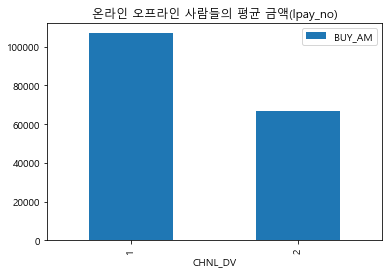

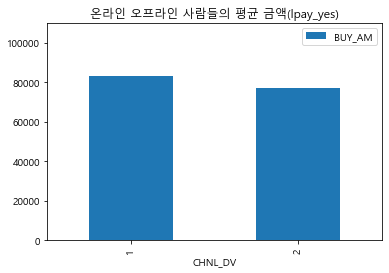

In [49]:
zon_buy_am = buy_am_lpay_no[['CHNL_DV','BUY_AM']]
zon_buy_am = zon_buy_am.groupby('CHNL_DV').mean()
zon_buy_am.plot.bar()

plt.title("온라인 오프라인 사람들의 평균 금액(lpay_no)")
plt.show()
zon_buy_am = buy_am_lpay_yes[['CHNL_DV','BUY_AM']]
zon_buy_am = zon_buy_am.groupby('CHNL_DV').mean()
zon_buy_am.plot.bar()
plt.ylim([0, 110000]) 
plt.title("온라인 오프라인 사람들의 평균 금액(lpay_yes)")
plt.show()

원래 데이터 eda를 봤을때도 알겠지만 offline으로 주문하는것이 online보다 훨씬 매출이 높다.<br>
근데 lpay를 이용하는 사람들만 놓고 봤을때는 oneline과 offline이 비슷하다 <br>
그리고 품목을 기준으로 봤을 때 lpay를 이용하는 사람들은 평균적인 소비가격이 좀더 많은것으로 보인다.

# 상품명 PD_NM

In [9]:
pd_nm=result[['CUST','MA_FEM_DV','AGES','C_ZON_HLV','CHNL_DV','PD_NM','COP_C', 'DE_HR','LPAY_USE','BUY_CT']]

NameError: name 'result' is not defined

In [62]:
pd_nm

,CUST,MA_FEM_DV,AGES,C_ZON_HLV,CHNL_DV,PD_NM,COP_C,DE_HR,LPAY_USE,BUY_CT
0,M430112881,0,50,17,1,남성티셔츠,110,10,0,1
1,M646853852,0,40,13,1,기타주방일회용품,110,10,0,1
2,M430112881,0,50,17,1,남성티셔츠,110,10,0,1
3,M430112881,0,50,17,1,남성티셔츠,110,10,0,1
4,M430112881,0,50,17,1,남성티셔츠,110,10,0,1
...,...,...,...,...,...,...,...,...,...,...
353179,M470112503,0,50,16,2,NULL,160,11,1,0
353180,M470112503,0,50,16,2,NULL,160,21,1,0
353181,M748878049,0,30,10,1,NULL,120,20,1,0
353182,M748878049,0,30,10,1,NULL,120,18,1,0


In [63]:
# PD_NM은 PDDE만 사용
pd_nm= pd_nm[pd_nm['LPAY_USE']==0]
pd_nm = pd_nm[pd_nm['BUY_CT']>0]
pd_nm

,CUST,MA_FEM_DV,AGES,C_ZON_HLV,CHNL_DV,PD_NM,COP_C,DE_HR,LPAY_USE,BUY_CT
0,M430112881,0,50,17,1,남성티셔츠,110,10,0,1
1,M646853852,0,40,13,1,기타주방일회용품,110,10,0,1
2,M430112881,0,50,17,1,남성티셔츠,110,10,0,1
3,M430112881,0,50,17,1,남성티셔츠,110,10,0,1
4,M430112881,0,50,17,1,남성티셔츠,110,10,0,1
...,...,...,...,...,...,...,...,...,...,...
381738,M533286446,1,40,10,2,백화점/마트모바일상품권,160,23,0,1
381739,M533286446,1,40,10,2,백화점/마트모바일상품권,160,23,0,1
381740,M533286446,1,40,10,2,백화점/마트모바일상품권,160,23,0,1
381741,M533286446,1,40,10,2,백화점/마트모바일상품권,160,23,0,1


In [64]:
print((pd_nm['PD_NM'].unique())) 

['남성티셔츠' '기타주방일회용품' '커피/음료' ... '레저모바일상품권' '숙박' '자동차/레저렌탈']


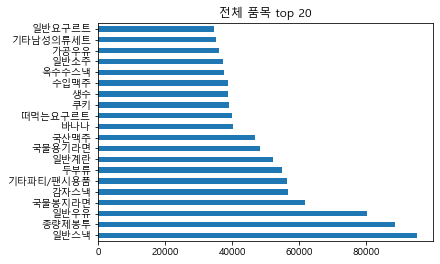

In [65]:
pd_nm['PD_NM'].value_counts().nlargest(20).plot(kind='barh')
plt.rcParams['font.family']='Malgun Gothic'
plt.title("전체 품목 top 20")
plt.show() 

## 성별, 연령대에 따라

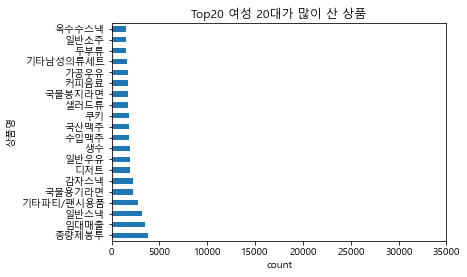

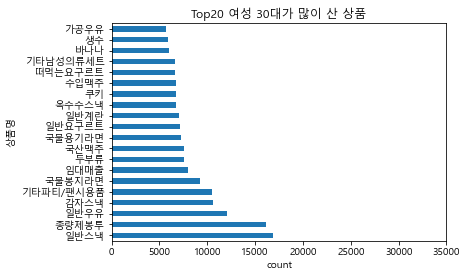

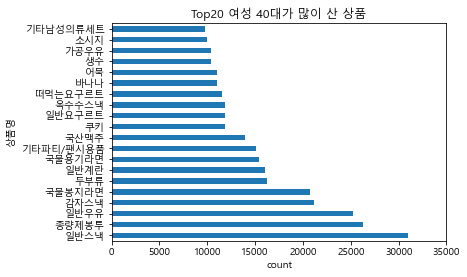

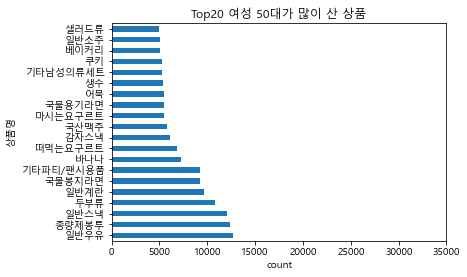

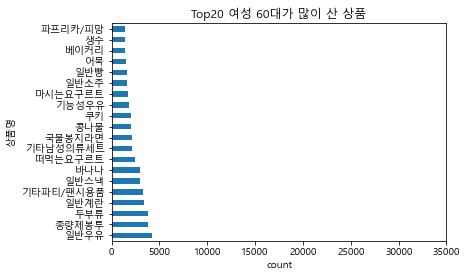

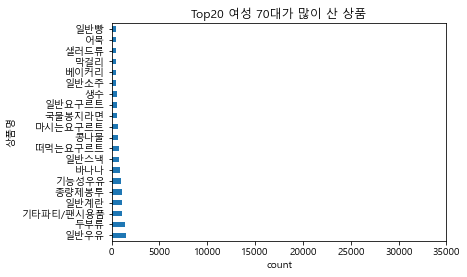

In [66]:
for i in range(20,80,10):
    M_ = pd_nm[(pd_nm['AGES']==i) & (pd_nm['MA_FEM_DV']==0)]
    M_['PD_NM'].value_counts().nlargest(20).plot(kind='barh')
    plt.xlabel('count')
    plt.ylabel('상품명')
    plt.title('Top20 여성 '+str(i)+'대가 많이 산 상품')
    plt.xlim([0, 35000])
    plt.show()

20대 여성의 경우 임대 매출이 상위권에 있었고<br>
대부분 전체 품목 순위이랑 비슷하다

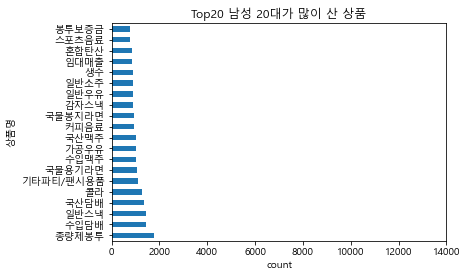

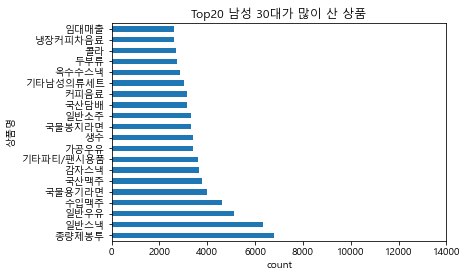

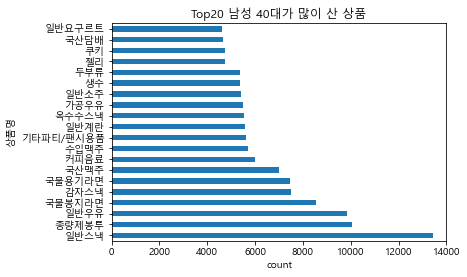

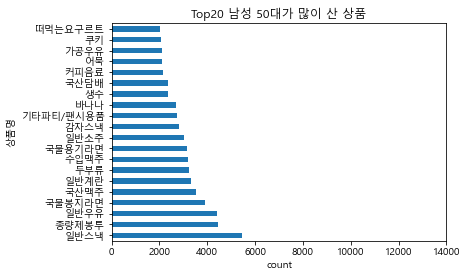

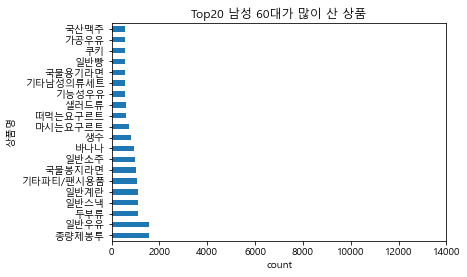

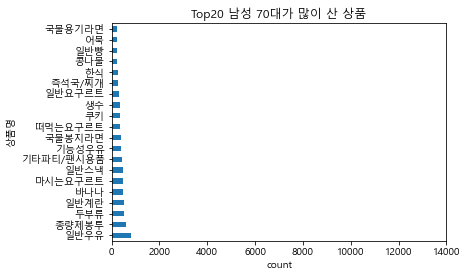

In [67]:
for i in range(20,80,10):
    M_ = pd_nm[(pd_nm['AGES']==i) & (pd_nm['MA_FEM_DV']==1)]
    M_['PD_NM'].value_counts().nlargest(20).plot(kind='barh')
    plt.xlabel('count')
    plt.ylabel('상품명')
    plt.title('Top20 남성 '+str(i)+'대가 많이 산 상품')
    plt.xlim([0, 14000]) 
    plt.show()

남성 고객의 대부분은 전체 순위와 비슷한 반면 <br>
남성 20대는 콜라, 수입담배와 일반담배의 구매가 많이 일어나고, <br>
남성 20대 30대는 수입맥주를 많이 먹고 40대,50대는 국산맥주를 많이 먹는다 그리고 그 이후로 맥주구매가<br>
6-70대의 경우 두부류나 일반계란과 일반우유의 구매가 늘어났다.

## 거주지에 따라

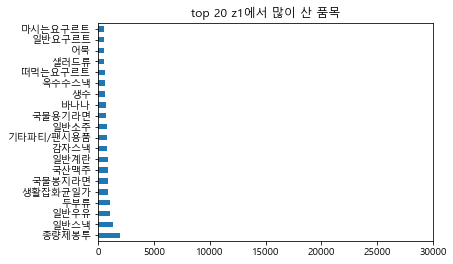

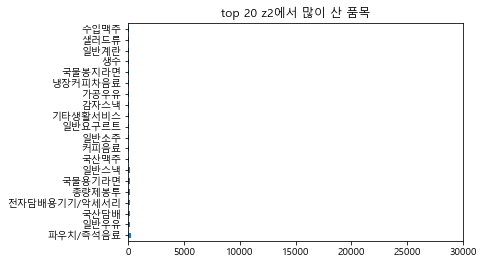

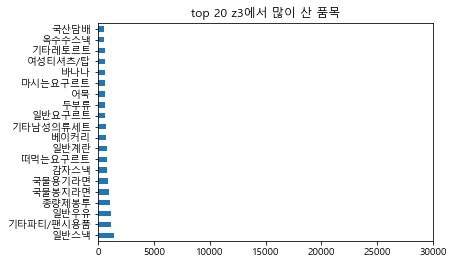

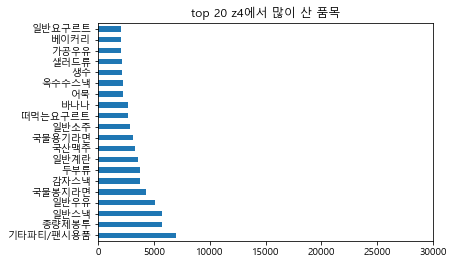

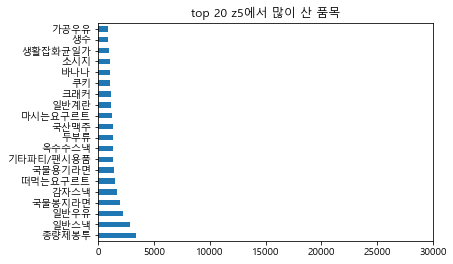

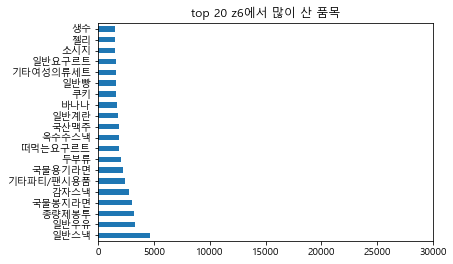

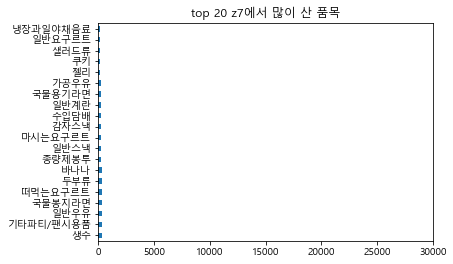

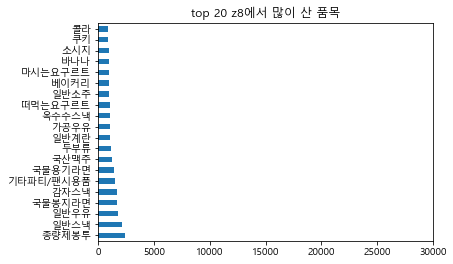

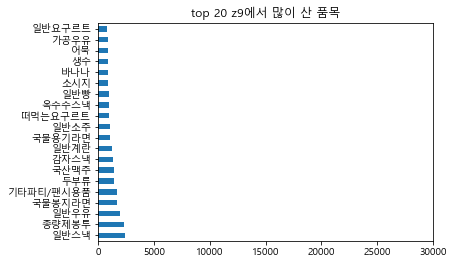

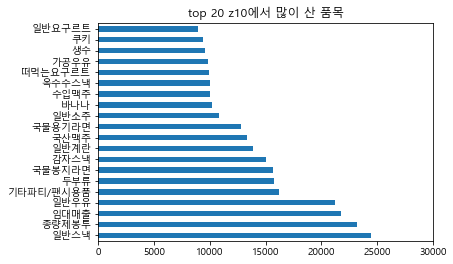

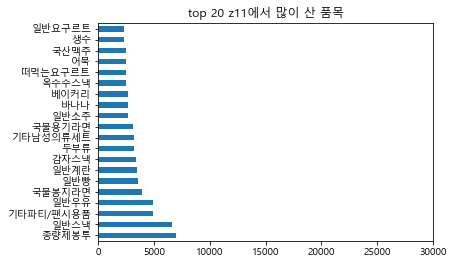

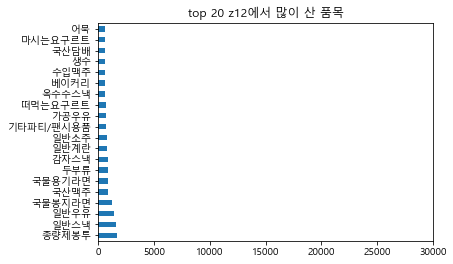

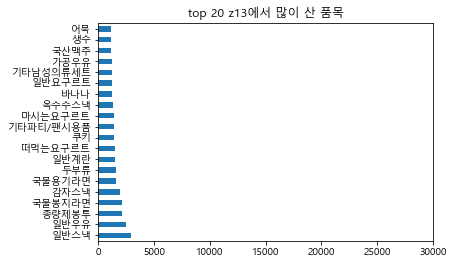

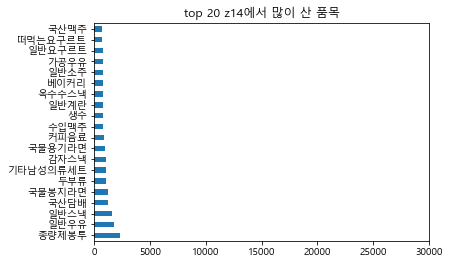

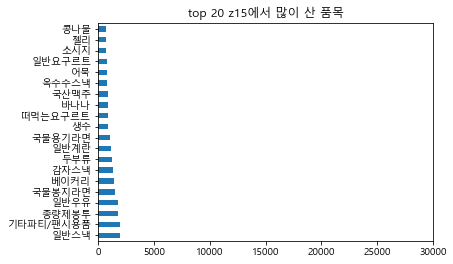

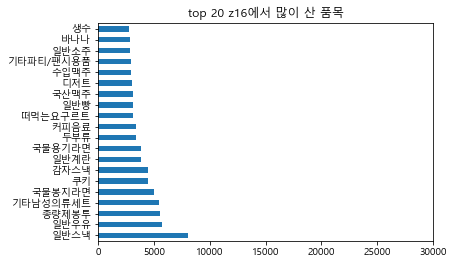

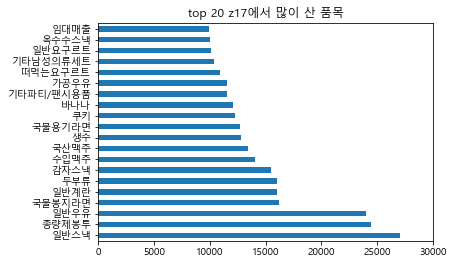

In [68]:
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]:
    d_ = pd_nm[(pd_nm["C_ZON_HLV"]== i)]
    d_['PD_NM'].value_counts().nlargest(20).plot(kind='barh')
    plt.title("top 20 z"+str(i)+"에서 많이 산 품목")
    plt.xlim([0, 30000]) 
    plt.show()

전체적으로 스낵을 많이 산다 <br>
특별한거 딱히 못 찾았음

## 온/오프라인에 따라

In [69]:
on = pd_nm[(pd_nm['CHNL_DV']==2)]
off = pd_nm[(pd_nm['CHNL_DV']==1)]

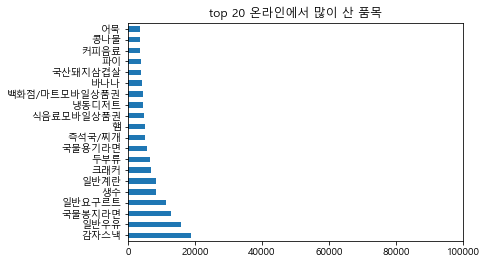

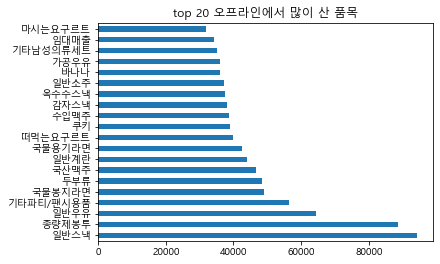

In [70]:
on['PD_NM'].value_counts().nlargest(20).plot(kind='barh')
plt.title("top 20 온라인에서 많이 산 품목")
plt.xlim([0, 100000])
plt.show()
off['PD_NM'].value_counts().nlargest(20).plot(kind='barh')
plt.title("top 20 오프라인에서 많이 산 품목")
plt.show()

# 제휴사(COP_C)

In [76]:
cop = result[['CUST','MA_FEM_DV','AGES','C_ZON_HLV','COP_C','CHNL_DV']] #df 만들기

## 성별 연령별 제휴사 이용정보 시각화

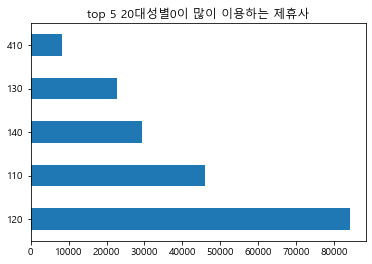

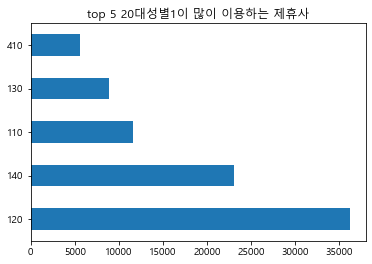

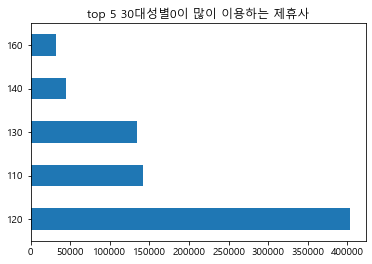

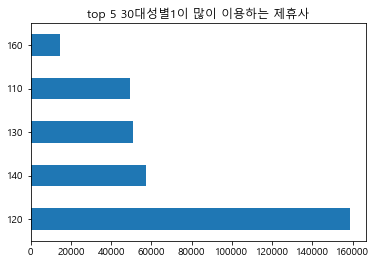

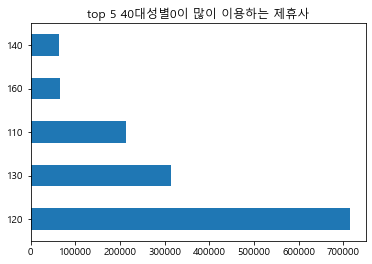

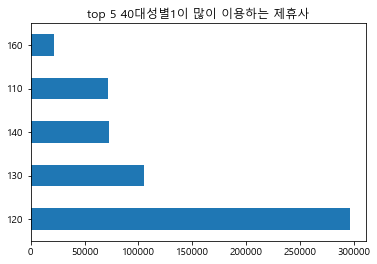

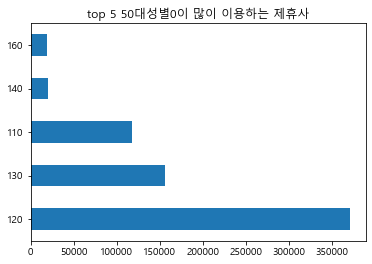

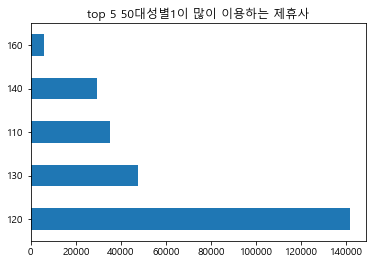

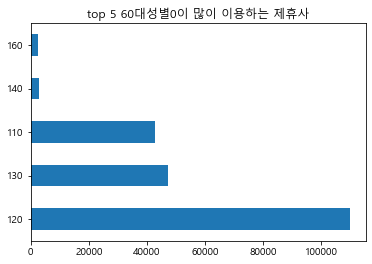

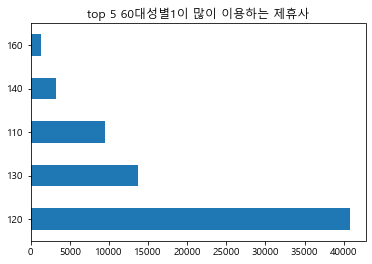

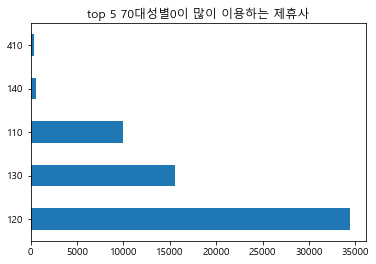

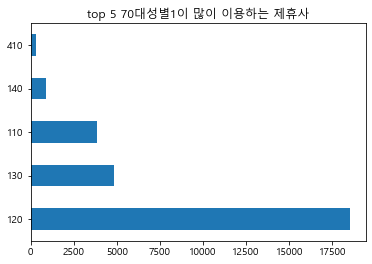

In [72]:
for i in [20,30,40,50,60,70]:
    for r in [0,1]:
        a_ = cop[(cop["AGES"]== i)& (cop['MA_FEM_DV']==r)]
        a_['COP_C'].value_counts().nlargest(5).plot(kind='barh')
        plt.title("top 5 "+str(i)+"대"+"성별"+str(r)+"이 많이 이용하는 제휴사")
        plt.show()

 모든 연령층이 A02제휴사를 가장많이 이용하며<br> 40-70대는 A03제휴사를 두번재로 많이 이용하며<br>
 20-30대 여자들은 A01제휴사를 남자들은 A04 제휴사를 두번째로 이용을 많이한다.<br>
 또한 20대 에만 제휴사D01를 자주 이용하는 모습을 볼 수 있다.

## 거주지별 제휴사 이용정보 시각화

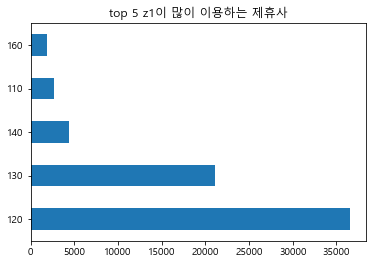

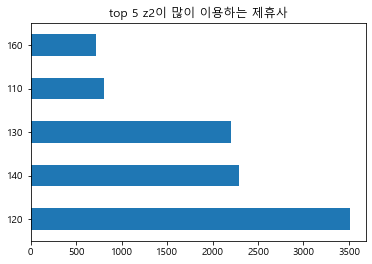

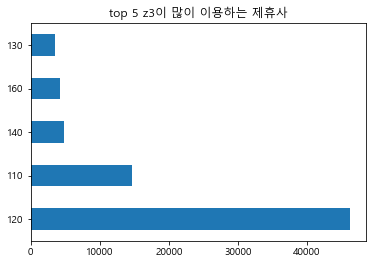

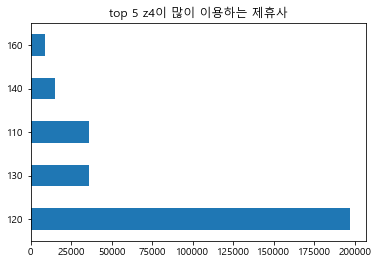

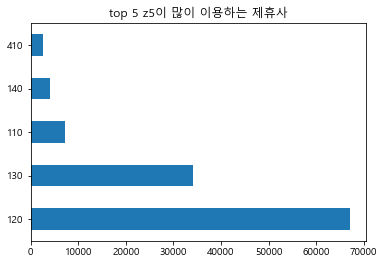

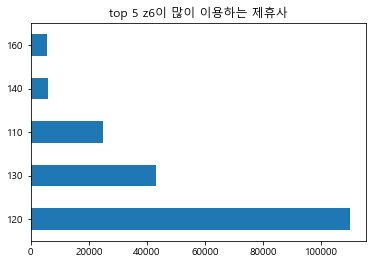

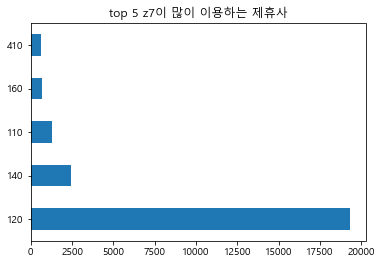

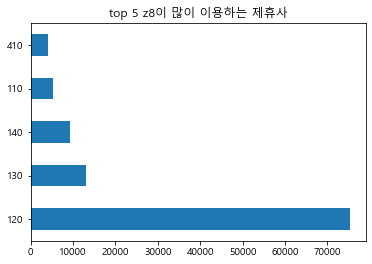

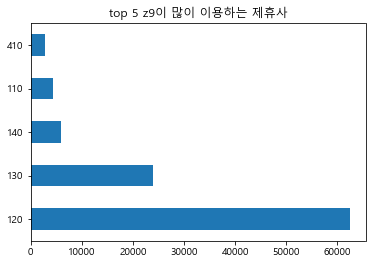

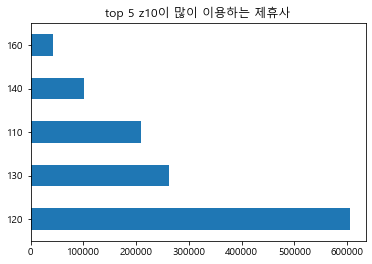

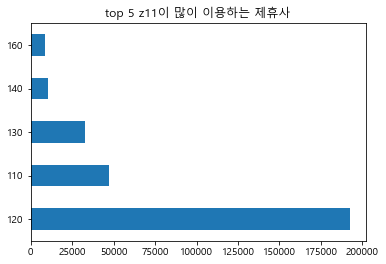

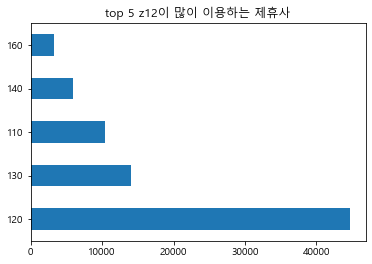

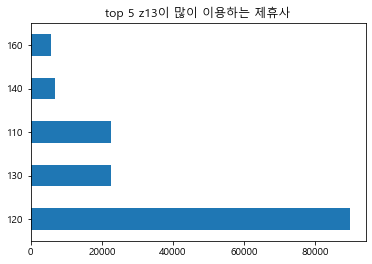

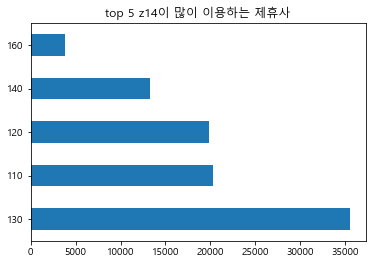

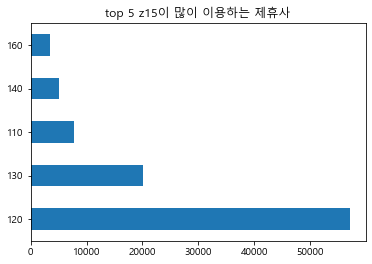

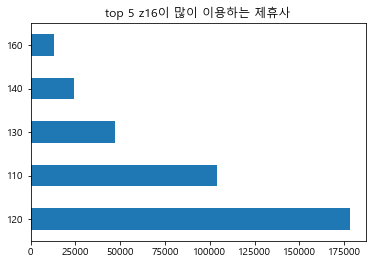

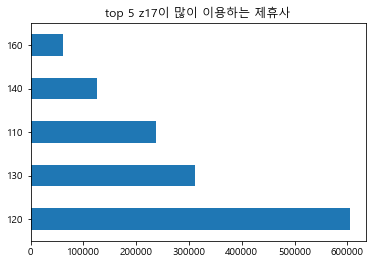

In [73]:
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]:
    e_ = cop[(cop["C_ZON_HLV"]== i)]
    e_['COP_C'].value_counts().nlargest(5).plot(kind='barh')
    plt.title("top 5 z"+str(i)+"이 많이 이용하는 제휴사")
    plt.show()

모든 거주지역에서 A02를 많이 사용하고<br> Z2,7에서는 A04를 두번째로 많이 사용하며,<br>
z3,11,14,16은 A01를 두번째로 많이 사용하며<br> 나머지 거주지역은 A03을 두번째로 많이 사용하며<br>
A02,01,03,04,06 ,D01이 모든 거주지들이 자주 사용하는 제휴사들이다.

## 온/오프라인에 따라

In [80]:
off1 = cop[(cop['CHNL_DV']==1)]
on1 = cop[(cop['CHNL_DV']==2)]

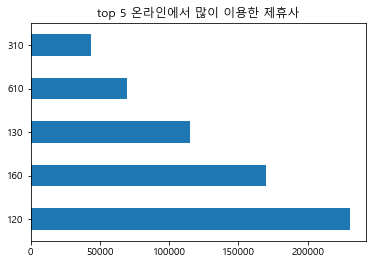

In [81]:
on1['COP_C'].value_counts().nlargest(5).plot(kind='barh')
plt.title("top 5 온라인에서 많이 이용한 제휴사")
plt.show()

online에서는 상대적으로 L01제휴사를 많이 이용한다. 

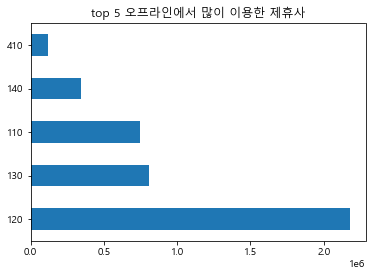

In [82]:
off1['COP_C'].value_counts().nlargest(5).plot(kind='barh')
plt.title("top 5 오프라인에서 많이 이용한 제휴사")
plt.show()

offline에서는 A를 많이 쓴다.

# 구매수량(BUY_CT)

In [51]:
# df 만들기
pdde = result[(result['LPAY_USE']==0) & (result['BUY_CT']>0)] # lapy 사용 x (애초에 pdde_df만을 사용하기에 모든 사람들이 lpay x임)

In [52]:
buy_ct=pdde[['CUST','MA_FEM_DV','AGES','C_ZON_HLV','CHNL_DV','DE_DT','BUY_CT']]

In [53]:
buy_ct_s=buy_ct.groupby(['CUST','MA_FEM_DV','AGES','C_ZON_HLV','CHNL_DV','DE_DT']).sum()

In [54]:
buy_ct_s=buy_ct_s.reset_index()

## 성별 연령대별 총및 평균구매수량

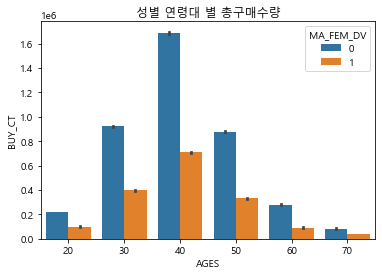

In [57]:
sns.barplot(x="AGES", y="BUY_CT", hue="MA_FEM_DV", data=buy_ct_s,estimator=sum)
plt.rcParams['font.family']='Malgun Gothic'
plt.title("성별 연령대 별 총구매수량")
plt.show()

 40대 여성이 가장 많은 구매를 했으며 전체적으로 보아도 40대가 (남녀포함) 구매를 가장많이 했음을 알 수 있다.

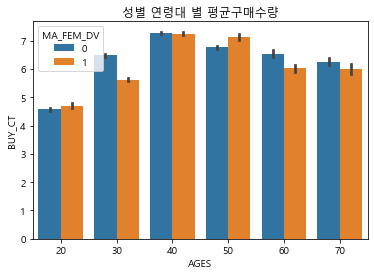

In [56]:
sns.barplot(x="AGES", y="BUY_CT", hue="MA_FEM_DV", data=buy_ct_s)
plt.rcParams['font.family']='Malgun Gothic'
plt.title("성별 연령대 별 평균구매수량")
plt.show()

20대가 평균적으로 적은 수량을 사는모습을 알 수 있다.

## 지역별 총 및평균구매수량

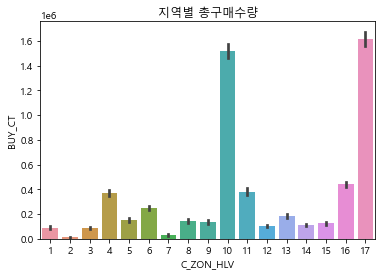

In [98]:
sns.barplot(x="C_ZON_HLV", y="BUY_CT", data=buy_ct_s,estimator=sum)
plt.rcParams['font.family']='Malgun Gothic'
plt.title("지역별 총구매수량")
plt.show()

 z17과 z10에 사는 사람들이 총 구매량은 가장 많은 모습을 알 수 있다.

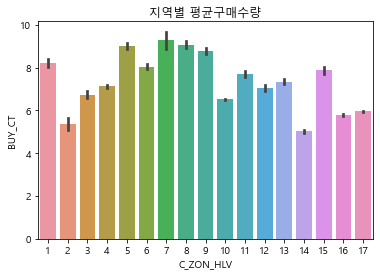

In [59]:
sns.barplot(x="C_ZON_HLV", y="BUY_CT", data=buy_ct_s)
plt.rcParams['font.family']='Malgun Gothic'
plt.title("지역별 평균구매수량")
plt.show()

Z10 과 17지역이 이용자가 가장 많았는데 평균 구매수량은 다른 지역보다 적은 모습을 보인다.

## 온오프라인별 평균&총구매 수량

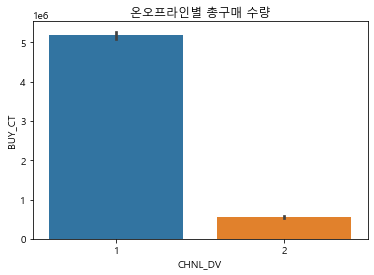

In [99]:
sns.barplot(x="CHNL_DV", y="BUY_CT", data=buy_ct_s,estimator=sum)
plt.title("온오프라인별 총구매 수량")
plt.show()

 오프라인 구매자들이 온라인 구매자들보다 훨씬 많이 구매를 하는 것으로 보아 오프라인을 이용하는 고객들이 많다는 것을 알 수 있다.

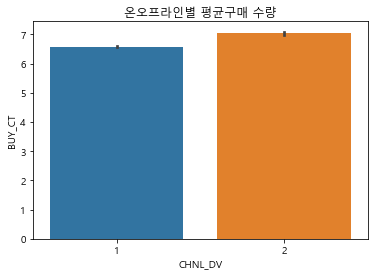

In [63]:
sns.barplot(x="CHNL_DV", y="BUY_CT", data=buy_ct_s)
plt.title("온오프라인별 평균구매 수량")
plt.show()
# 1은 오프라인 2가 온라인

 온라인 구매자들이 평균적으로 많이 구매하는 것을 알 수 있다. 하지만 큰 차이는 없다.

# 요일별 (DAY) visualization

그냥 구매가격처럼 총 합산으로 보는것 보다 cust를 기준으로 그룹화를 하고 시각화를 한다<br>
데이터는 각 물품들 구매 내역인데 사람 몇명을 기준으로 할지로 생각을 하고 해본다

In [100]:
day = result[[ 'CUST','MA_FEM_DV', 'AGES', 'C_ZON_HLV','DE_DT', 'DAY', 'CHNL_DV','LPAY_USE','BUY_AM']]

In [102]:
day_lpay_no= day[day['LPAY_USE']==0]
day_lpay_yes = day[day['LPAY_USE']==1]
day_lpay_no

,CUST,MA_FEM_DV,AGES,C_ZON_HLV,DE_DT,DAY,CHNL_DV,LPAY_USE,BUY_AM
0,M430112881,0,50,17,2021-01-01,4,1,0,15000
1,M646853852,0,40,13,2021-01-01,4,1,0,79700
2,M430112881,0,50,17,2021-01-01,4,1,0,19000
3,M430112881,0,50,17,2021-01-01,4,1,0,19000
4,M430112881,0,50,17,2021-01-01,4,1,0,19000
...,...,...,...,...,...,...,...,...,...
248244,M058650684,0,20,10,2021-11-16,1,1,0,2000
248245,M058650684,0,20,10,2021-11-16,1,1,0,26900
248246,M014154595,0,30,12,2021-12-12,6,2,0,2000
248247,M510878172,1,20,17,2021-11-27,5,2,0,6000


In [103]:
day_lpay_no = pd.pivot_table(day_lpay_no, index = ['CUST','DE_DT', 'CHNL_DV']
               ,values = ['AGES', 'C_ZON_HLV','MA_FEM_DV','DAY','BUY_AM'] 
               ,aggfunc = {'AGES':np.mean,'C_ZON_HLV':np.mean,'MA_FEM_DV':np.mean,'BUY_AM':np.sum,'DAY':np.mean})
day_lpay_no

AGES  BUY_AM  C_ZON_HLV  DAY  MA_FEM_DV
CUST       DE_DT      CHNL_DV                                         
M000034966 2021-01-16 1          40  152200          7    5          0
           2021-03-25 1          40   90500          7    3          0
           2021-03-28 1          40   89560          7    6          0
           2021-06-29 1          40   65700          7    1          0
           2021-08-29 1          40    1400          7    6          0
...                             ...     ...        ...  ...        ...
M999962961 2021-12-19 2          50   26000         17    6          0
           2021-12-20 1          50    7500         17    0          0
           2021-12-23 1          50    5900         17    3          0
           2021-12-30 1          50   60900         17    3          0
           2021-12-31 1          50   28540         17    4          0

[1039379 rows x 5 columns]

In [104]:
day_lpay_no = day_lpay_no.reset_index()
day_lpay_no

,CUST,DE_DT,CHNL_DV,AGES,BUY_AM,C_ZON_HLV,DAY,MA_FEM_DV
0,M000034966,2021-01-16,1,40,152200,7,5,0
1,M000034966,2021-03-25,1,40,90500,7,3,0
2,M000034966,2021-03-28,1,40,89560,7,6,0
3,M000034966,2021-06-29,1,40,65700,7,1,0
4,M000034966,2021-08-29,1,40,1400,7,6,0
...,...,...,...,...,...,...,...,...
1039374,M999962961,2021-12-19,2,50,26000,17,6,0
1039375,M999962961,2021-12-20,1,50,7500,17,0,0
1039376,M999962961,2021-12-23,1,50,5900,17,3,0
1039377,M999962961,2021-12-30,1,50,60900,17,3,0


In [105]:
day_lpay_yes = pd.pivot_table(day_lpay_yes, index = ['CUST','DE_DT', 'CHNL_DV']
               ,values = ['AGES', 'C_ZON_HLV','MA_FEM_DV','DAY','BUY_AM'] 
               ,aggfunc = {'AGES':np.mean,'C_ZON_HLV':np.mean,'MA_FEM_DV':np.mean,'BUY_AM':np.sum,'DAY':np.mean})
day_lpay_yes

AGES  BUY_AM  C_ZON_HLV  DAY  MA_FEM_DV
CUST       DE_DT      CHNL_DV                                         
M000136117 2021-01-04 2          30   42600         11    0          0
           2021-01-09 1          30  902500         11    5          0
           2021-09-26 2          30   15100         11    6          0
           2021-11-20 2          30  177301         11    5          0
M000419293 2021-01-07 2          40   55880         17    3          0
...                             ...     ...        ...  ...        ...
M999962961 2021-06-18 1          50   45570         17    4          0
           2021-07-24 2          50    9156         17    5          0
           2021-08-19 1          50   22130         17    3          0
           2021-12-16 1          50  159600         17    3          0
           2021-12-30 1          50    8000         17    3          0

[270531 rows x 5 columns]

In [112]:
day_lpay_yes = day_lpay_yes.reset_index()
day_lpay_yes

,CUST,DE_DT,CHNL_DV,AGES,BUY_AM,C_ZON_HLV,DAY,MA_FEM_DV
0,M000136117,2021-01-04,2,30,42600,11,0,0
1,M000136117,2021-01-09,1,30,902500,11,5,0
2,M000136117,2021-09-26,2,30,15100,11,6,0
3,M000136117,2021-11-20,2,30,177301,11,5,0
4,M000419293,2021-01-07,2,40,55880,17,3,0
...,...,...,...,...,...,...,...,...
270526,M999962961,2021-06-18,1,50,45570,17,4,0
270527,M999962961,2021-07-24,2,50,9156,17,5,0
270528,M999962961,2021-08-19,1,50,22130,17,3,0
270529,M999962961,2021-12-16,1,50,159600,17,3,0


## 요일별 각 사람이 방문한 횟수(성별)

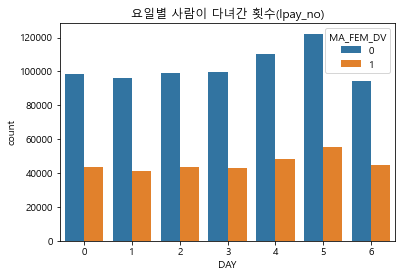

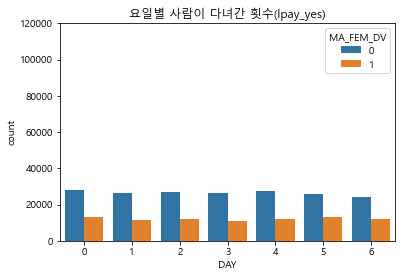

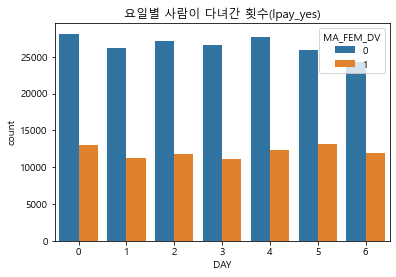

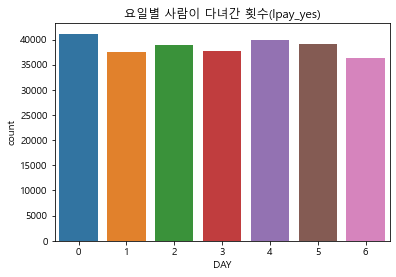

In [124]:
sns.countplot(x="DAY", hue="MA_FEM_DV", data = day_lpay_no)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("요일별 사람이 다녀간 횟수(lpay_no)")
plt.show()
sns.countplot(x="DAY", hue="MA_FEM_DV", data = day_lpay_yes)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("요일별 사람이 다녀간 횟수(lpay_yes)")
plt.ylim([0, 120000])
plt.show()
sns.countplot(x="DAY", hue="MA_FEM_DV", data = day_lpay_yes)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("요일별 사람이 다녀간 횟수(lpay_yes)")
plt.show()
sns.countplot(x="DAY", data = day_lpay_yes)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("요일별 사람이 다녀간 횟수(lpay_yes)")
plt.show()

## 요일별 각 사람이 방문한 횟수(나이대)

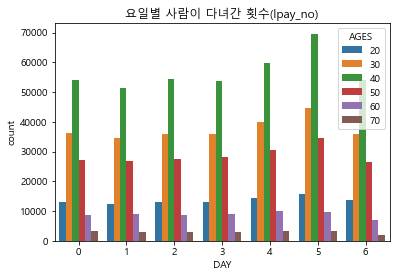

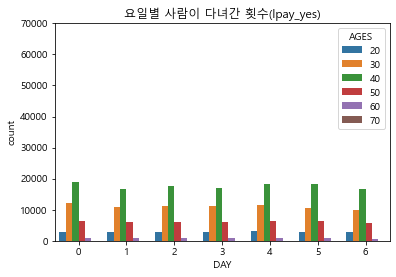

In [109]:
sns.countplot(x="DAY", hue="AGES", data = day_lpay_no)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("요일별 사람이 다녀간 횟수(lpay_no)")
plt.show()
sns.countplot(x="DAY", hue="AGES", data = day_lpay_yes)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("요일별 사람이 다녀간 횟수(lpay_yes)")
plt.ylim([0, 70000]) 
plt.show()

## 요일별 각 사람이 방문한 횟수(on/off)

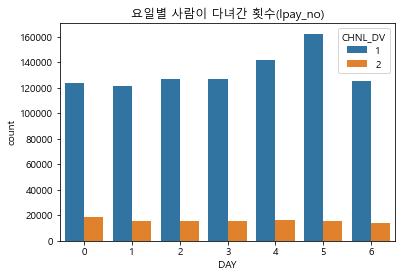

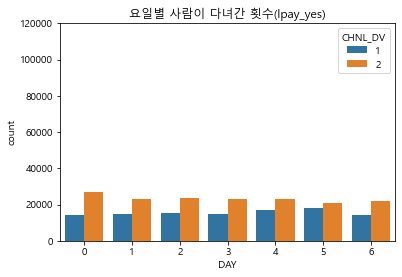

In [113]:
sns.countplot(x="DAY", hue="CHNL_DV", data = day_lpay_no)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("요일별 사람이 다녀간 횟수(lpay_no)")
plt.show()
sns.countplot(x="DAY", hue="CHNL_DV", data = day_lpay_yes)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("요일별 사람이 다녀간 횟수(lpay_yes)")
plt.ylim([0, 120000]) 
plt.show()

## 요일별 각 사람이 방문한 횟수(지역별)

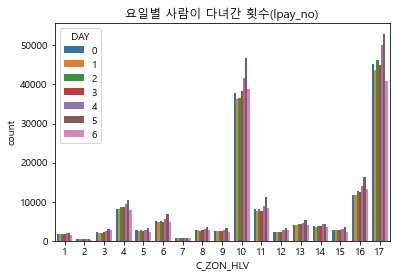

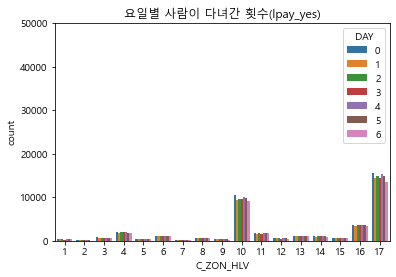

In [114]:
sns.countplot(x="C_ZON_HLV", hue="DAY", data = day_lpay_no)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("요일별 사람이 다녀간 횟수(lpay_no)")
plt.show()
sns.countplot(x="C_ZON_HLV", hue="DAY", data = day_lpay_yes)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("요일별 사람이 다녀간 횟수(lpay_yes)")
plt.ylim([0, 50000]) 
plt.show()

lpay를 안쓰는 사람들은 금,토가 사람들이 가장 많았고 생각보다 일요일에 방문한사람들의 수는 적었다.<br>
lpay를 쓰는 사람들은 요일별로 차이가 거의 없었다.<br>
40대 여성이 가장 많이 방문하고 온라인 오프라인도 딱히 뭐 특이한 점은 없다<br>
딱히 insight를 뽑을 만한 것은 없는듯..<br>

## 구매가격을 고려한 요일별 시각화

여기서부터는 그냥 내가 따로 찍어본거인데 그냥 요일은 의미가 없고 요일별 구매가격같은 시각화가 의미있다고 생각해 따로 찍어본것이다

### 날짜에 따른 구매금액의 합산과 평균

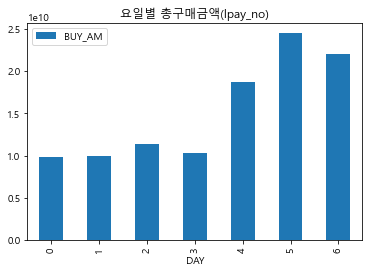

In [117]:
day_buy_am = day_lpay_no[['DAY','BUY_AM']]
day_buy_am = day_buy_am.groupby('DAY').sum()
day_buy_am.plot.bar()
plt.title("요일별 총구매금액(lpay_no)")
plt.show()

<span style = 'color:red'>lpay를 안 쓴 사람이 일요일에 방문한사람에 비해 총구매금액이 좀 많이 높다

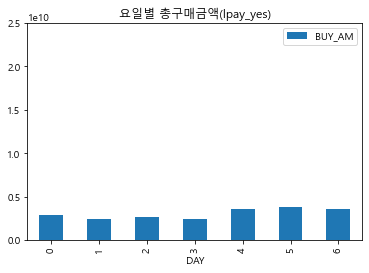

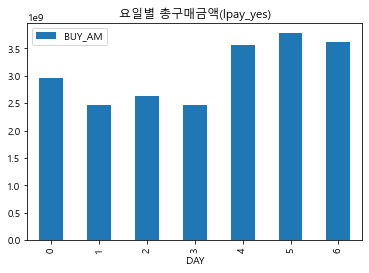

In [122]:
day_buy_am = day_lpay_yes[['DAY','BUY_AM']]
day_buy_am = day_buy_am.groupby('DAY').sum()
day_buy_am.plot.bar()
plt.title("요일별 총구매금액(lpay_yes)")
plt.ylim([0, 25000000000]) 
plt.show()
day_buy_am = day_lpay_yes[['DAY','BUY_AM']]
day_buy_am = day_buy_am.groupby('DAY').sum()
day_buy_am.plot.bar()
plt.title("요일별 총구매금액(lpay_yes)")
plt.show()

<span style = 'color:red'>lpay 쓴 사람들 중 요일별 방문횟수는 월요일 제일 많은데 총 구매금액은 금토일이 높다.

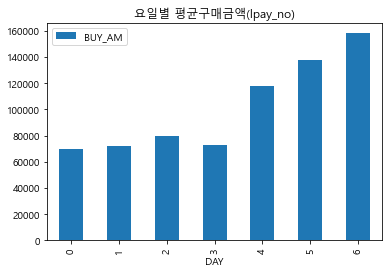

In [118]:
day_buy_am = day_lpay_no[['DAY','BUY_AM']]
day_buy_am = day_buy_am.groupby('DAY').mean()
day_buy_am.plot.bar()
plt.title("요일별 평균구매금액(lpay_no)")
plt.show()

###  성별과 요일에 따른 구매금액 총 합산

단순히 요일만 보는것이 아닌 다른 변수들 성별이나 나이대에도 특별한 무언가가 있는지 시각화해보겠다

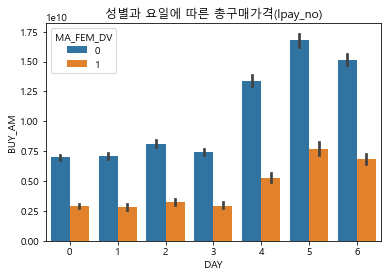

In [126]:
sns.barplot(x="DAY", y="BUY_AM", hue="MA_FEM_DV", data=day_lpay_no, estimator=sum)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("성별과 요일에 따른 총구매가격(lpay_no)")
plt.show()

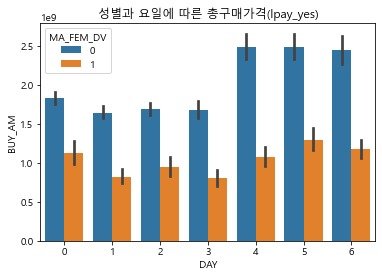

In [127]:
sns.barplot(x="DAY", y="BUY_AM", hue="MA_FEM_DV", data=day_lpay_yes, estimator=sum)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("성별과 요일에 따른 총구매가격(lpay_yes)")
plt.show()

### 나이와 요일에 따른 구매금액 총 합산

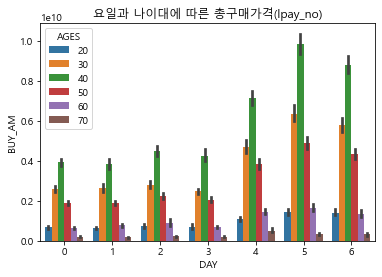

In [128]:
sns.barplot(x="DAY", y="BUY_AM", hue="AGES", data=day_lpay_no, estimator=sum)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("요일과 나이대에 따른 총구매가격(lpay_no)")
plt.show()

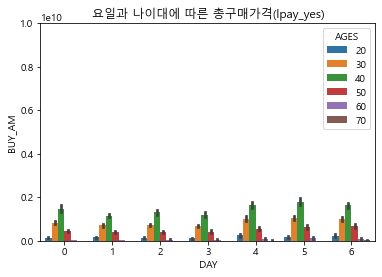

In [132]:
sns.barplot(x="DAY", y="BUY_AM", hue="AGES", data=day_lpay_yes, estimator=sum)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("요일과 나이대에 따른 총구매가격(lpay_yes)")
plt.ylim([0, 10000000000]) 
plt.show()

# 시간대 DE_HR

In [133]:
hr_lpay_no= result[result['LPAY_USE']==0]
hr_lpay_yes = result[result['LPAY_USE']==1]
hr_lpay_no

,CUST,MA_FEM_DV,AGES,C_ZON_HLV,BUY_AM,COP_C,CHNL_DV,DE_DT,PD_C,BUY_CT,S_ZON_HLV,MONTH,DATE,DAY,DE_HR,CLAC_HLV_NM,CLAC_MCLS_NM,PD_NM,LPAY_USE
0,M430112881,0,50,17,15000,110,1,2021-01-01,290,1,10,1,1,4,10,남성의류,남성의류상의,남성티셔츠,0
1,M646853852,0,40,13,79700,110,1,2021-01-01,1369,1,13,1,1,4,10,주방잡화,주방일회용품,기타주방일회용품,0
2,M430112881,0,50,17,19000,110,1,2021-01-01,290,1,10,1,1,4,10,남성의류,남성의류상의,남성티셔츠,0
3,M430112881,0,50,17,19000,110,1,2021-01-01,290,1,10,1,1,4,10,남성의류,남성의류상의,남성티셔츠,0
4,M430112881,0,50,17,19000,110,1,2021-01-01,290,1,10,1,1,4,10,남성의류,남성의류상의,남성티셔츠,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248244,M058650684,0,20,10,2000,320,1,2021-11-16,4000,0,17,11,16,1,14,NULL,NULL,NULL,0
248245,M058650684,0,20,10,26900,320,1,2021-11-16,4000,0,17,11,16,1,19,NULL,NULL,NULL,0
248246,M014154595,0,30,12,2000,310,2,2021-12-12,4000,0,14,12,12,6,9,NULL,NULL,NULL,0
248247,M510878172,1,20,17,6000,310,2,2021-11-27,4000,0,17,11,27,5,19,NULL,NULL,NULL,0


## 성별에 따라

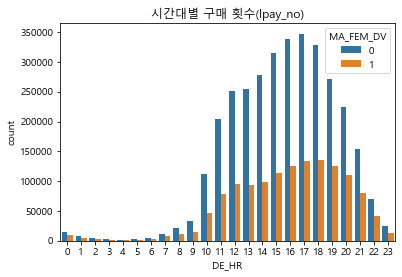

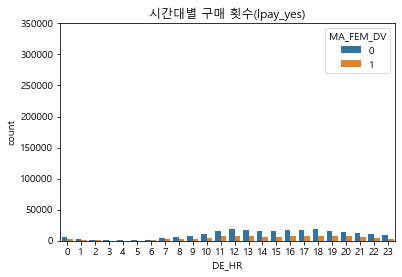

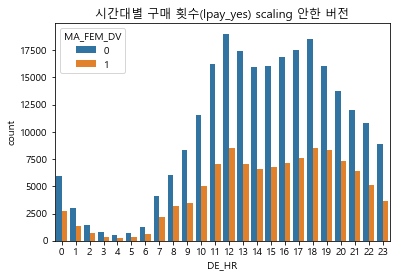

In [134]:
sns.countplot(x="DE_HR", hue="MA_FEM_DV", data =hr_lpay_no )
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("시간대별 구매 횟수(lpay_no)")
plt.show()
sns.countplot(x="DE_HR", hue="MA_FEM_DV",data =hr_lpay_yes)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("시간대별 구매 횟수(lpay_yes)")
plt.ylim([0, 350000]) 
plt.show()
sns.countplot(x="DE_HR", hue="MA_FEM_DV",data =hr_lpay_yes)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("시간대별 구매 횟수(lpay_yes) scaling 안한 버전")
plt.show()

<span style = 'color:red'>LPAY 이용안하는 사람은 오전 10시부터 급격히 증가하고 17시까지 증가한다.<br>
LPAY 이용하는 사람은 오전 7시부터 급격히 증가하고 12시 찍고 내려가다가 다시 18에 피크를 찍고 떨어지는 head and shoulder 모형이다.<br>
LPAY 이용자가 이용 안하는 사람들에 비해 더 다양한 시간대에 구매를 한다

## 온/오프라인에 따라

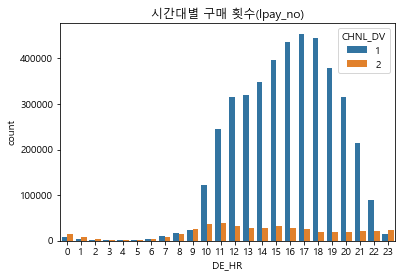

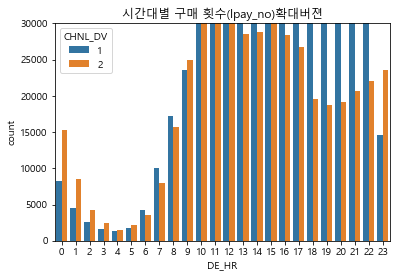

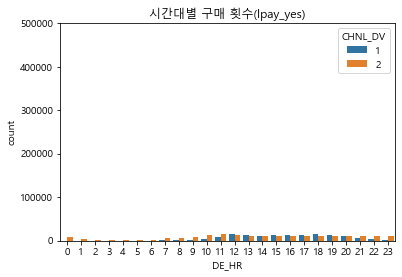

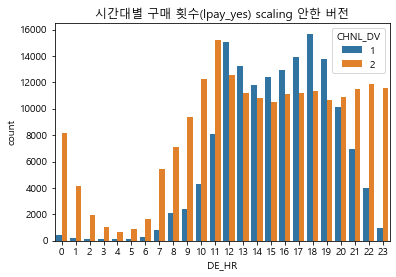

In [138]:
sns.countplot(x="DE_HR", hue="CHNL_DV", data =hr_lpay_no )
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("시간대별 구매 횟수(lpay_no)")
plt.show()
sns.countplot(x="DE_HR", hue="CHNL_DV", data =hr_lpay_no )
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("시간대별 구매 횟수(lpay_no)확대버젼")
plt.ylim([0, 30000]) 
plt.show()
sns.countplot(x="DE_HR", hue="CHNL_DV",data =hr_lpay_yes)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.ylim([0, 500000]) 
plt.title("시간대별 구매 횟수(lpay_yes)")
plt.show()
sns.countplot(x="DE_HR", hue="CHNL_DV",data =hr_lpay_yes)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("시간대별 구매 횟수(lpay_yes) scaling 안한 버전")
plt.show()

<span style = 'color:red'>LPAY 이용안하는 사람은 23시부터 05시까지 온라인구매가 오프라인보다 많다.<br>
LPAY 이용하는 사람은 반대로 12시부터 19시까지 오프라인구매가 온라인구매보다 많다.<br>

## 거주지에 따라

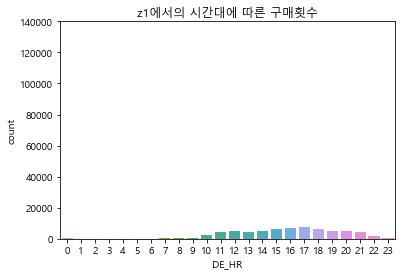

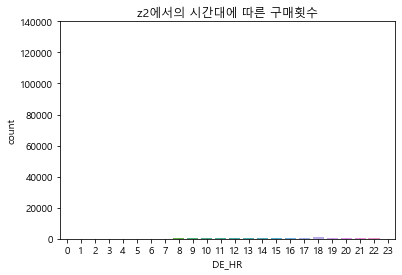

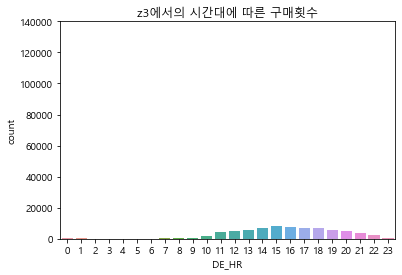

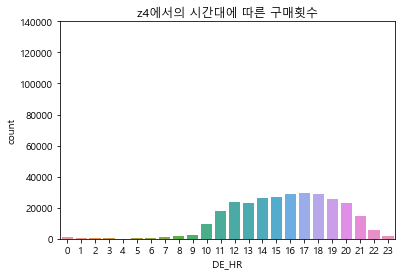

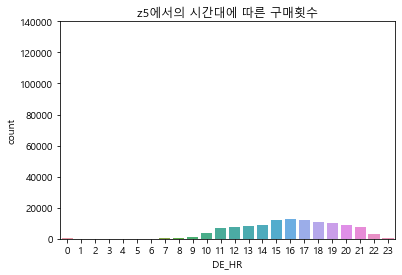

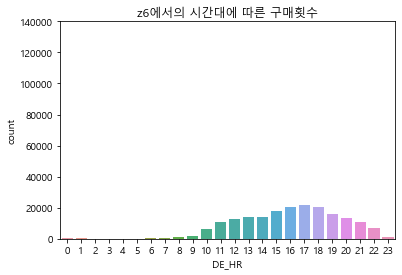

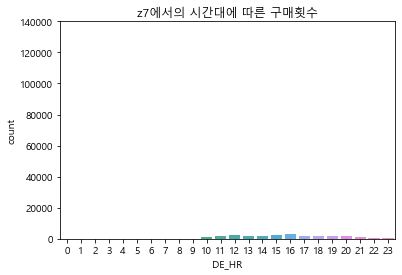

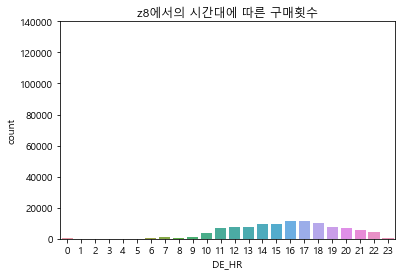

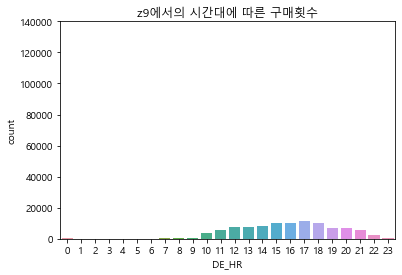

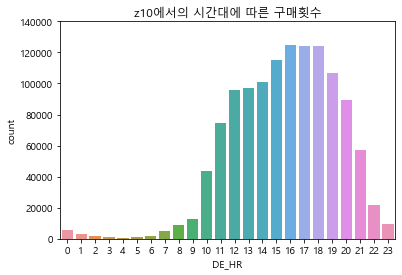

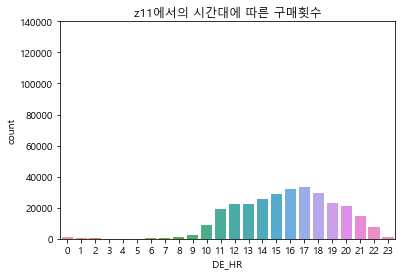

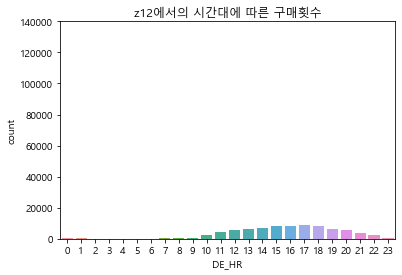

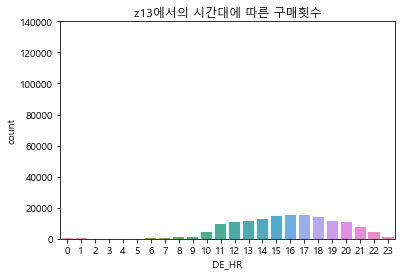

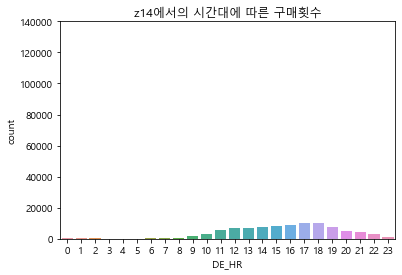

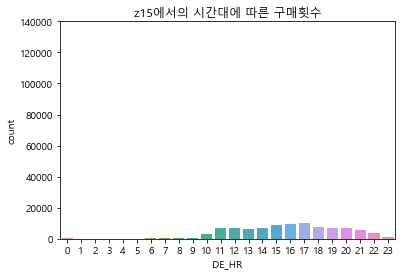

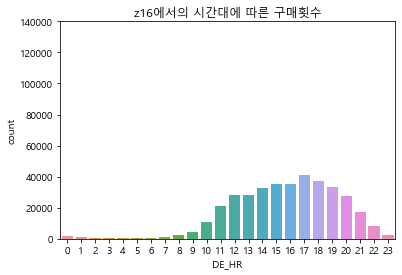

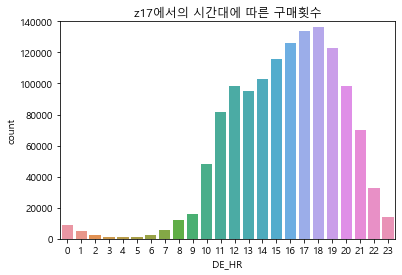

In [58]:
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]:
    d = hr_lpay_no[(hr_lpay_no["C_ZON_HLV"]== i)]
    sns.countplot(x="DE_HR", data =d)
    plt.title("z"+str(i)+"에서의 시간대에 따른 구매횟수")
    plt.ylim([0, 140000]) 
    plt.show()    

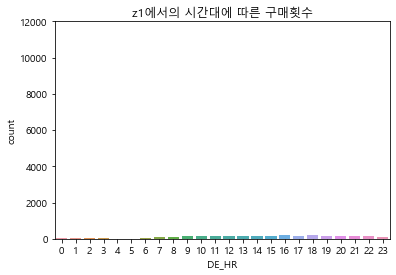

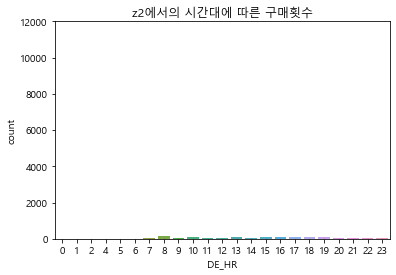

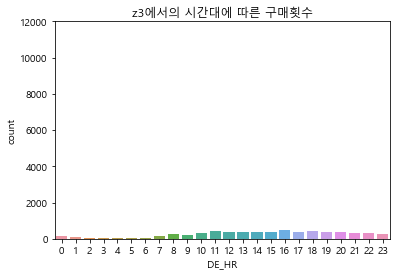

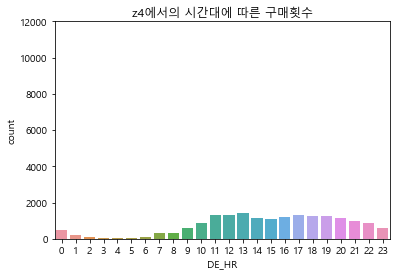

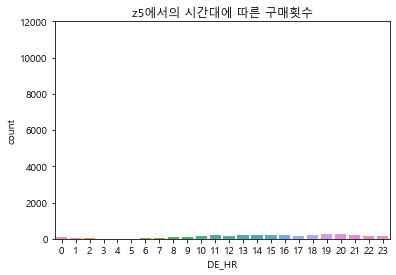

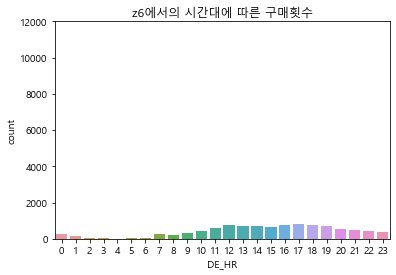

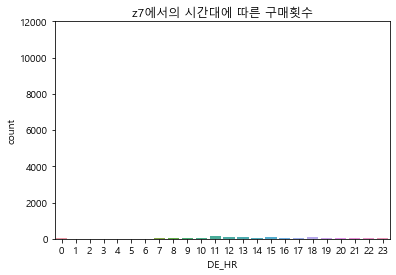

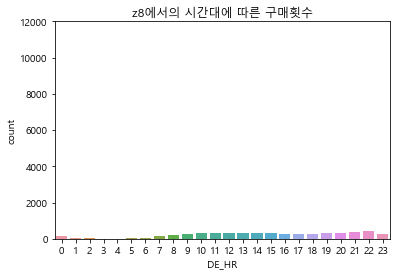

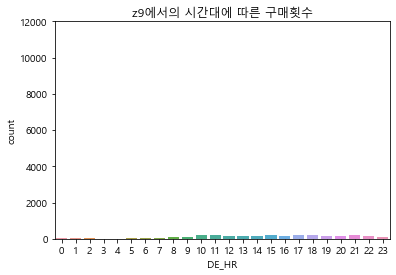

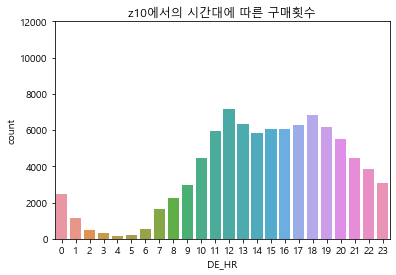

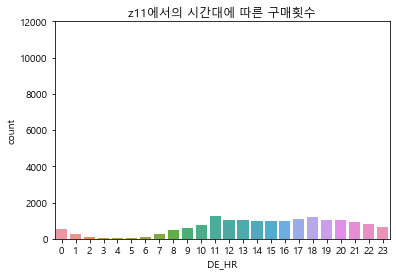

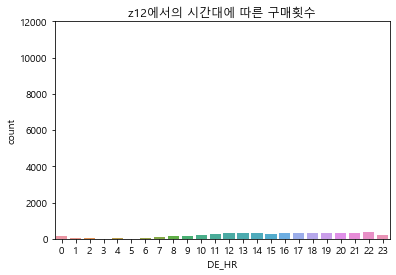

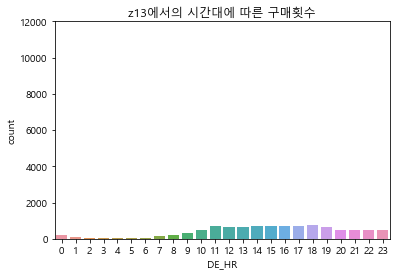

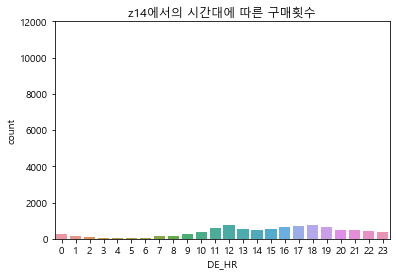

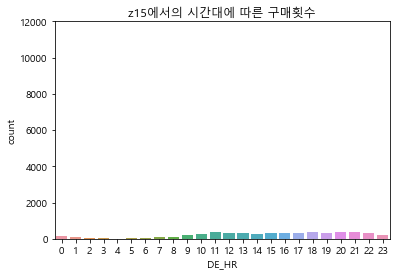

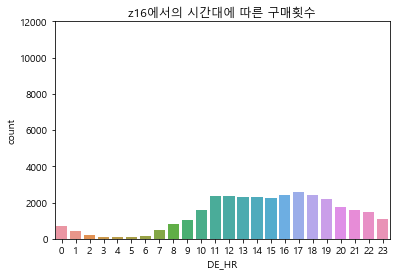

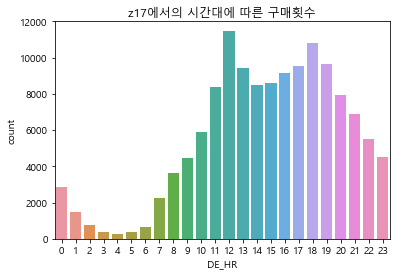

In [141]:
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]:
    d = hr_lpay_yes[(hr_lpay_yes["C_ZON_HLV"]== i)]
    sns.countplot(x="DE_HR", data =d)
    plt.title("z"+str(i)+"에서의 시간대에 따른 구매횟수")
    plt.ylim([0, 12000]) 
    plt.show()    

# 상품 분류 중 (CLAC_MCLS_NM) visualization

상품 분류의 코드는 lpay는 알지 못한다 그러니 이거는 lpay를 쓴 사람 말고 확인하겠다.<br>
lpay안 쓴사람들 중에서 pdde만 써야한다 그래서 buy_ct가 0인것들도 제외하고 하겠다.

In [23]:
mcls = result[[ 'CUST','MA_FEM_DV', 'AGES', 'C_ZON_HLV','DE_DT', 'CLAC_MCLS_NM', 'CHNL_DV','BUY_CT','LPAY_USE']]
mcls= mcls[mcls['LPAY_USE']==0]
mcls = mcls[mcls['BUY_CT']>0]
mcls

,CUST,MA_FEM_DV,AGES,C_ZON_HLV,DE_DT,CLAC_MCLS_NM,CHNL_DV,BUY_CT,LPAY_USE
0,M430112881,0,50,17,2021-01-01,남성의류상의,1,1,0
1,M646853852,0,40,13,2021-01-01,주방일회용품,1,1,0
2,M430112881,0,50,17,2021-01-01,남성의류상의,1,1,0
3,M430112881,0,50,17,2021-01-01,남성의류상의,1,1,0
4,M430112881,0,50,17,2021-01-01,남성의류상의,1,1,0
...,...,...,...,...,...,...,...,...,...
381738,M533286446,1,40,10,2021-12-31,모바일상품권,2,1,0
381739,M533286446,1,40,10,2021-12-31,모바일상품권,2,1,0
381740,M533286446,1,40,10,2021-12-31,모바일상품권,2,1,0
381741,M533286446,1,40,10,2021-12-31,모바일상품권,2,1,0


전체 중분류 top10

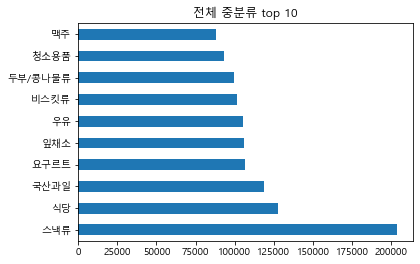

In [25]:
mcls['CLAC_MCLS_NM'].value_counts().nlargest(10).plot(kind='barh')
plt.rcParams['font.family']='Malgun Gothic'
plt.title("전체 중분류 top 10")
plt.show()

## 나이와 성별에 따른 구매상품 중분류

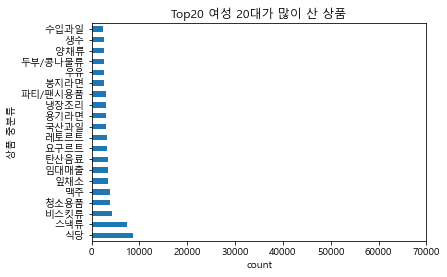

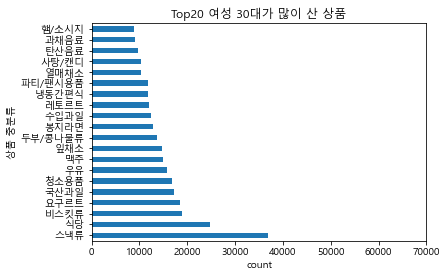

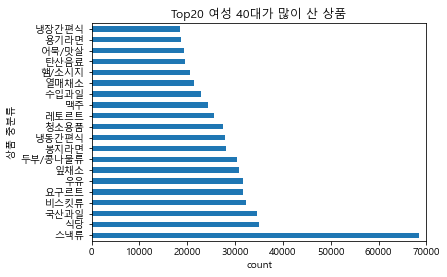

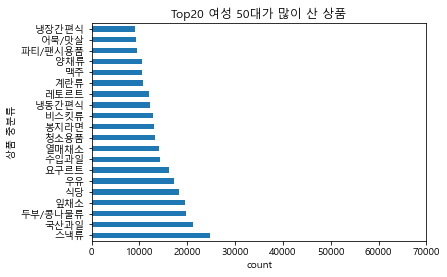

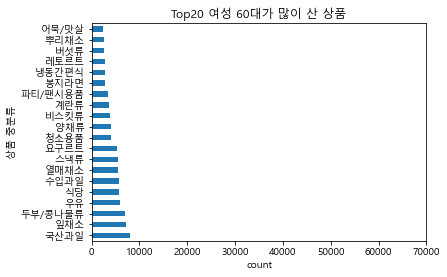

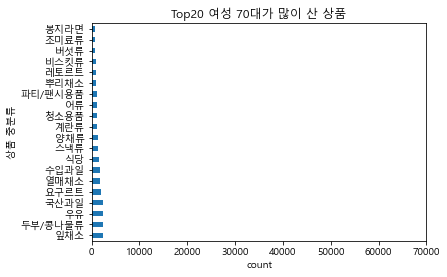

In [143]:
for i in range(20,80,10):
    M_ = mcls[(mcls['AGES']==i) & (mcls['MA_FEM_DV']==0)]
    M_['CLAC_MCLS_NM'].value_counts().nlargest(20).plot(kind='barh')
    plt.xlabel('count')
    plt.ylabel('상품 중분류')
    plt.title('Top20 여성 '+str(i)+'대가 많이 산 상품')
    plt.xlim([0, 70000])
    plt.show()

20대 여자는 식당을 많이가고 그다음세대부터는 스낵을 많이 먹고<br>
60대부터 갑자기 과일이랑 채소가 늘어난다

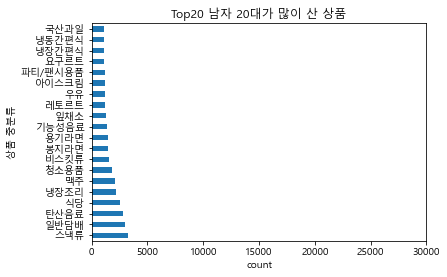

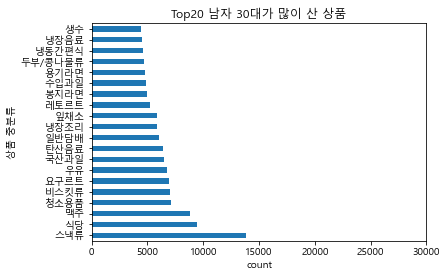

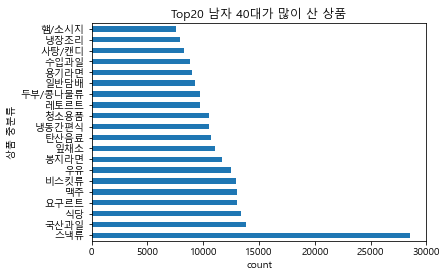

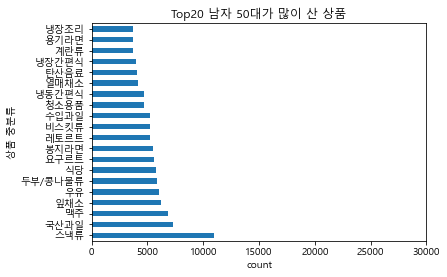

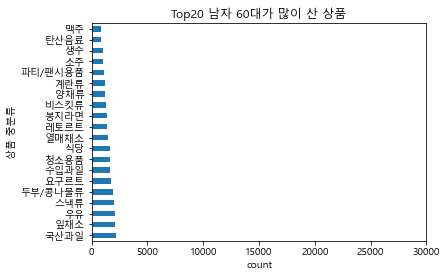

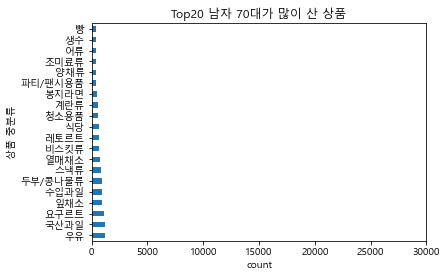

In [144]:
for i in range(20,80,10):
    M_ = mcls[(mcls['AGES']==i) & (mcls['MA_FEM_DV']==1)]
    M_['CLAC_MCLS_NM'].value_counts().nlargest(20).plot(kind='barh')
    plt.xlabel('count')
    plt.ylabel('상품 중분류')
    plt.title('Top20 남자 '+str(i)+'대가 많이 산 상품')
    plt.xlim([0, 30000]) 
    plt.show()

스낵류를 많이 먹고 그 60대부터 채소와 과일을 많이 산다

## 온라인 오프라인 구매상품 중분류

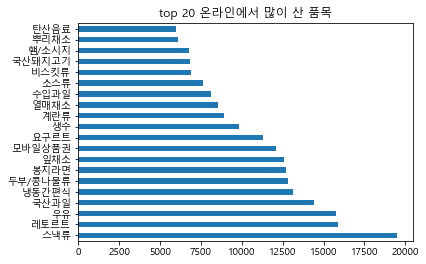

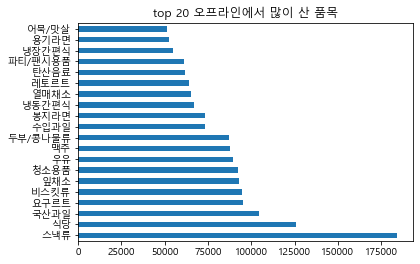

In [145]:
off = mcls[(mcls['CHNL_DV']==1)]
on = mcls[(mcls['CHNL_DV']==2)]
on['CLAC_MCLS_NM'].value_counts().nlargest(20).plot(kind='barh')
plt.title("top 20 온라인에서 많이 산 품목")
plt.show()
off['CLAC_MCLS_NM'].value_counts().nlargest(20).plot(kind='barh')
plt.title("top 20 오프라인에서 많이 산 품목")
plt.show()

온라인 오프라인 둘다 스낵을 많이 사지만 오프라인은 식당을 많이 가고 온라인은 보통 먹을거를 많이 산다

## 지역별 구매상품 중분류

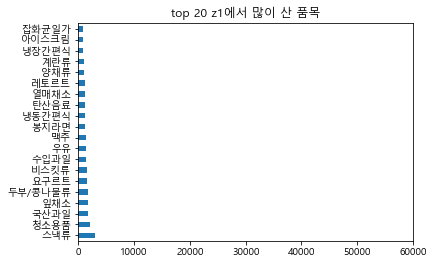

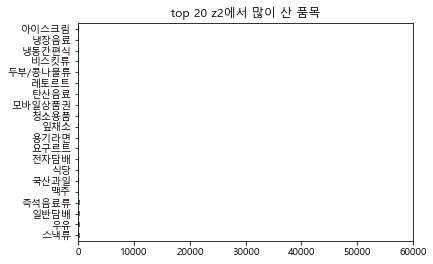

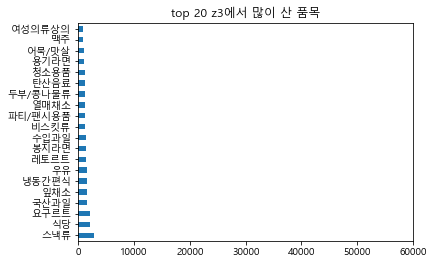

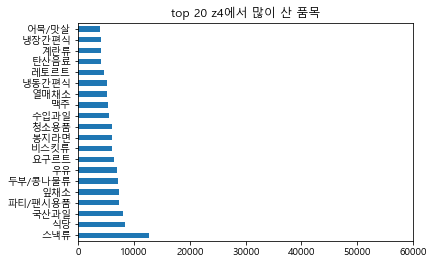

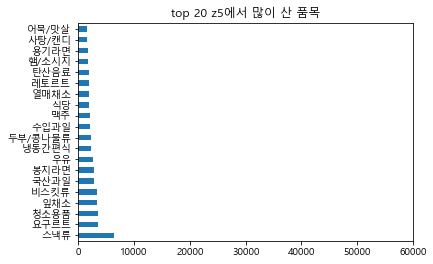

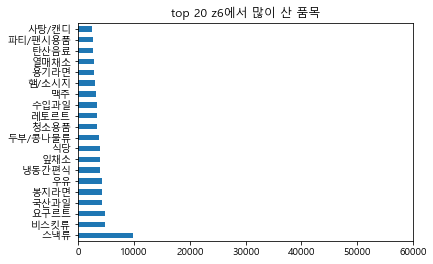

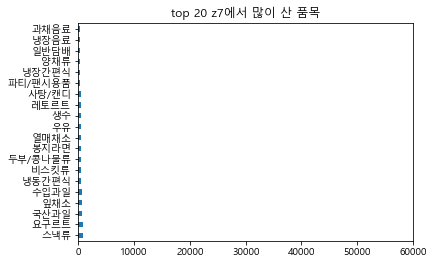

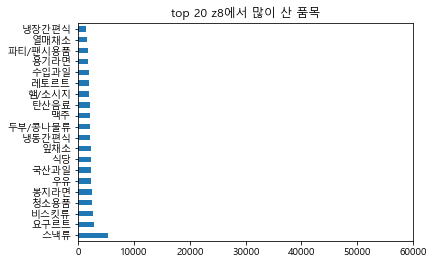

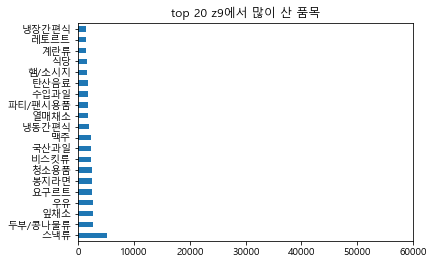

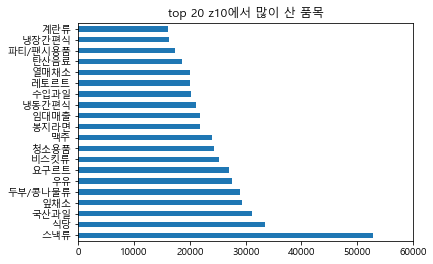

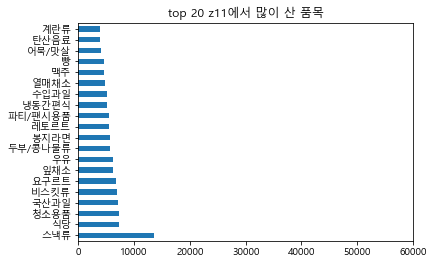

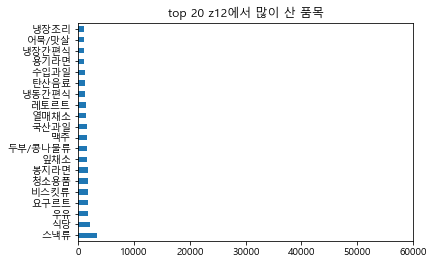

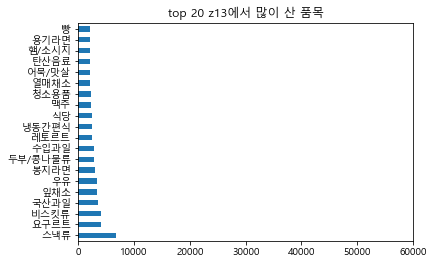

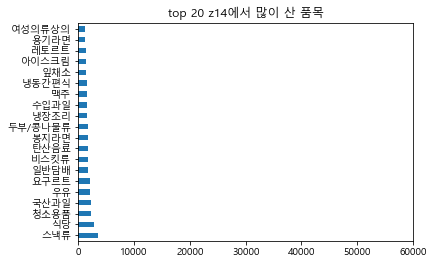

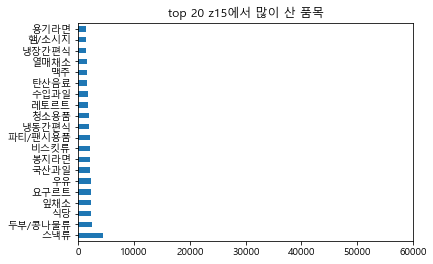

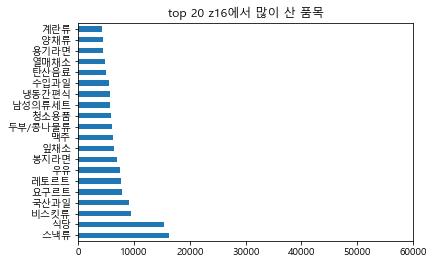

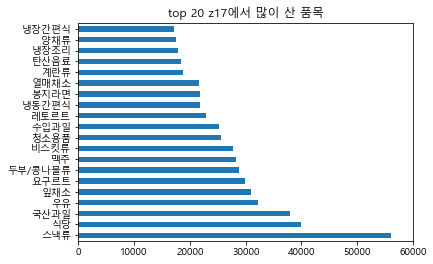

In [147]:
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]:
    d_ = mcls[(mcls["C_ZON_HLV"]== i)]
    d_['CLAC_MCLS_NM'].value_counts().nlargest(20).plot(kind='barh')
    plt.title("top 20 z"+str(i)+"에서 많이 산 품목")
    plt.xlim([0, 60000])
    plt.show()

그냥 다 비슷

# 상품 분류 대(CLAC_HLV_NM)

In [26]:
hlv = result[[ 'CUST','MA_FEM_DV', 'AGES', 'C_ZON_HLV','DE_DT', 'CLAC_HLV_NM', 'CHNL_DV','BUY_CT','LPAY_USE']]
hlv= hlv[hlv['LPAY_USE']==0]
hlv = hlv[hlv['BUY_CT']>0]
hlv

,CUST,MA_FEM_DV,AGES,C_ZON_HLV,DE_DT,CLAC_HLV_NM,CHNL_DV,BUY_CT,LPAY_USE
0,M430112881,0,50,17,2021-01-01,남성의류,1,1,0
1,M646853852,0,40,13,2021-01-01,주방잡화,1,1,0
2,M430112881,0,50,17,2021-01-01,남성의류,1,1,0
3,M430112881,0,50,17,2021-01-01,남성의류,1,1,0
4,M430112881,0,50,17,2021-01-01,남성의류,1,1,0
...,...,...,...,...,...,...,...,...,...
381738,M533286446,1,40,10,2021-12-31,상품권,2,1,0
381739,M533286446,1,40,10,2021-12-31,상품권,2,1,0
381740,M533286446,1,40,10,2021-12-31,상품권,2,1,0
381741,M533286446,1,40,10,2021-12-31,상품권,2,1,0


전체 대분류 top10

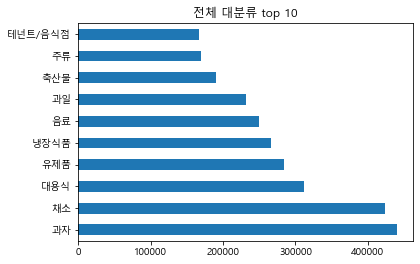

In [27]:
hlv['CLAC_HLV_NM'].value_counts().nlargest(10).plot(kind='barh')
plt.rcParams['font.family']='Malgun Gothic'
plt.title("전체 대분류 top 10")
plt.show()

## 나이와 성별에 따른 구매상품 대분류

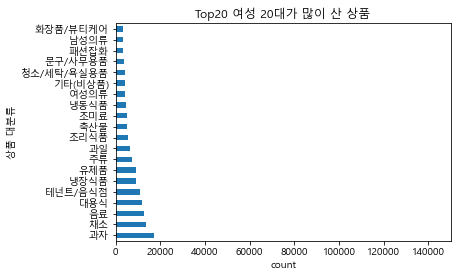

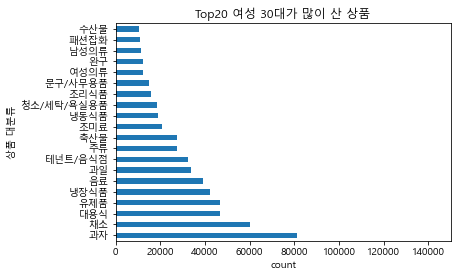

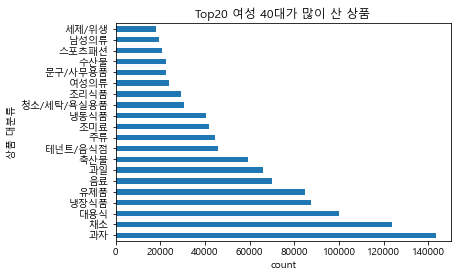

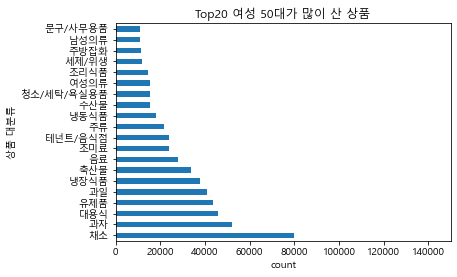

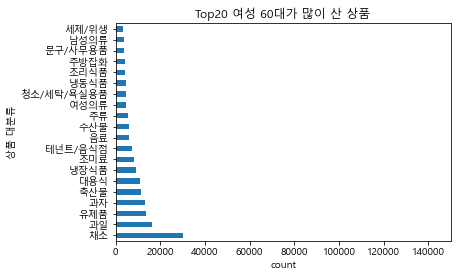

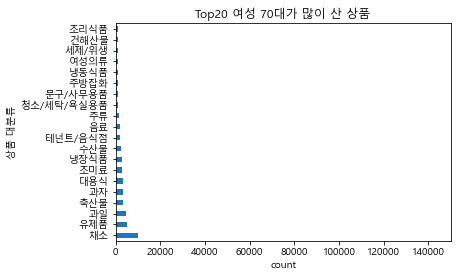

In [151]:
for i in range(20,80,10):
    M_ = hlv[(hlv['AGES']==i) & (hlv['MA_FEM_DV']==0)]
    M_['CLAC_HLV_NM'].value_counts().nlargest(20).plot(kind='barh')
    plt.xlabel('count')
    plt.ylabel('상품 대분류')
    plt.title('Top20 여성 '+str(i)+'대가 많이 산 상품')
    plt.xlim([0, 150000])
    plt.show()

여성은 20-40대까지는 과자를 가장많이 사고 50-70대는 채소를 가장많이 산다.<br>
또한 20대-40대까지는 과일이 top5에 없었는데 50대부터 과일을 많이 사는 경향을 보인다.<br>
또한 50대부터 축산물을 많이 사는 경향을 보인다.

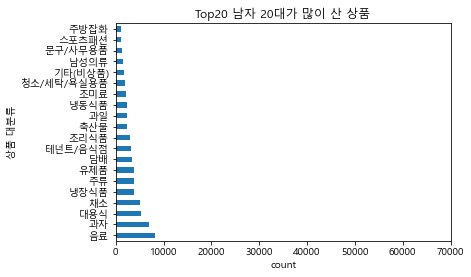

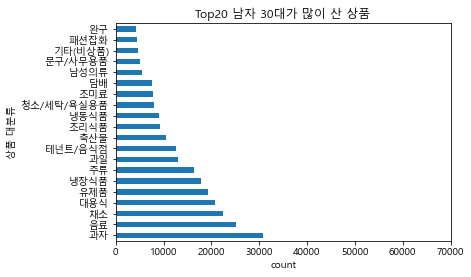

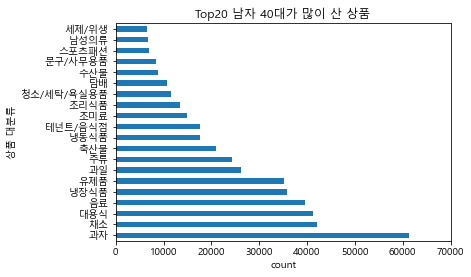

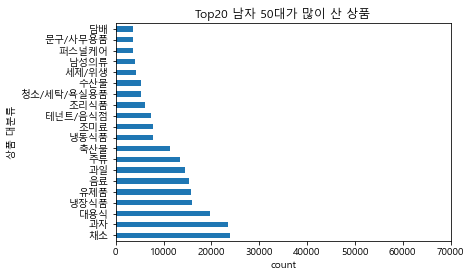

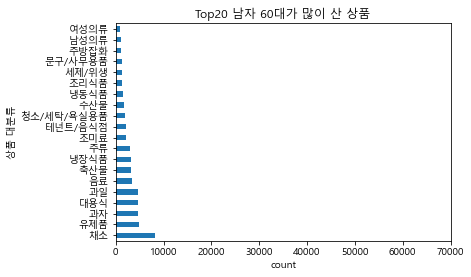

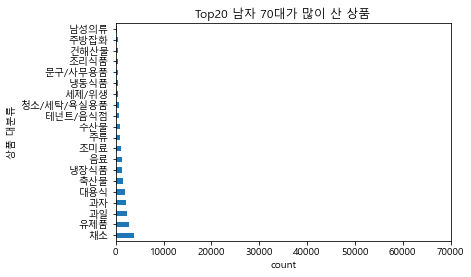

In [153]:
for i in range(20,80,10):
    M_ = hlv[(hlv['AGES']==i) & (hlv['MA_FEM_DV']==1)]
    M_['CLAC_HLV_NM'].value_counts().nlargest(20).plot(kind='barh')
    plt.xlabel('count')
    plt.ylabel('상품 대분류')
    plt.title('Top20 남자 '+str(i)+'대가 많이 산 상품')
    plt.xlim([0, 70000]) 
    plt.show()

남성같은 경우 모든연령대가 과자랑 채소를 많이산다.<BR>
60대부터 축산물을 많이 구매하기 시작하며,<BR> 20-60대까지 음료를 많이 구매한다.<bR> 30-70대는 유제품을 많이 구매한다.

## 온라인 오프라인 구매상품 대분류

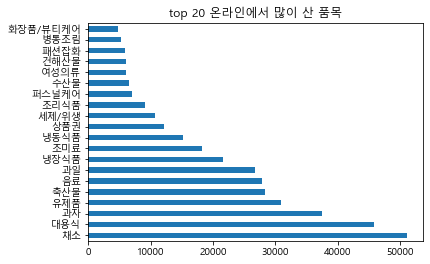

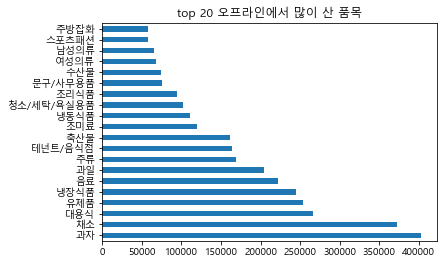

In [154]:
off = hlv[(hlv['CHNL_DV']==1)]
on = hlv[(hlv['CHNL_DV']==2)]
on['CLAC_HLV_NM'].value_counts().nlargest(20).plot(kind='barh')
plt.title("top 20 온라인에서 많이 산 품목")
plt.show()
off['CLAC_HLV_NM'].value_counts().nlargest(20).plot(kind='barh')
plt.title("top 20 오프라인에서 많이 산 품목")
plt.show()

온오프라인 둘다 채소 과자 대용식 유제품을 많이 구매를 하며 온라인같은 경우는 냉장식품을 오프라인같은경우는 축산물을 더 산다.

## 지역별 구매상품 중분류

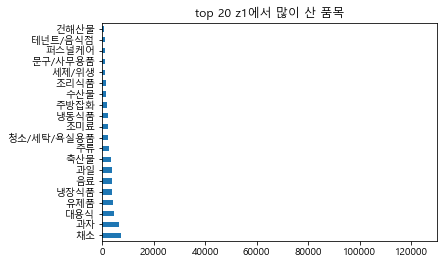

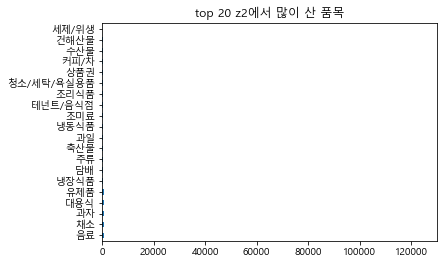

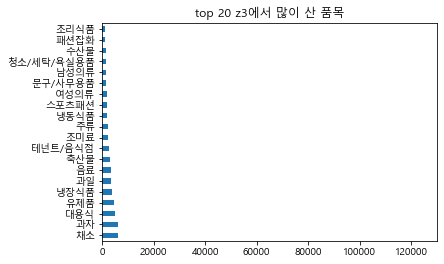

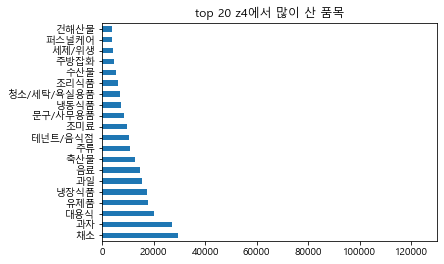

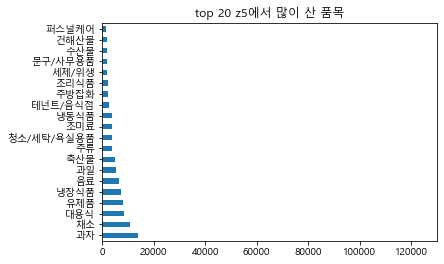

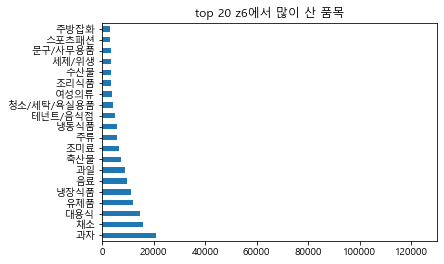

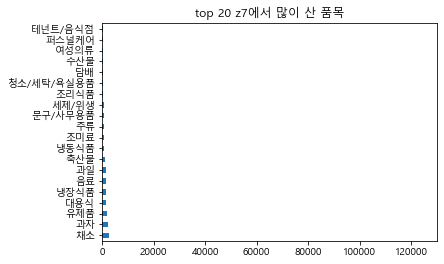

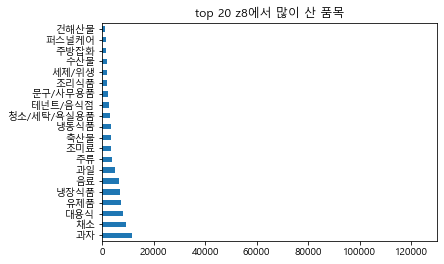

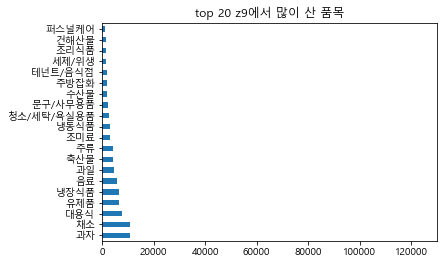

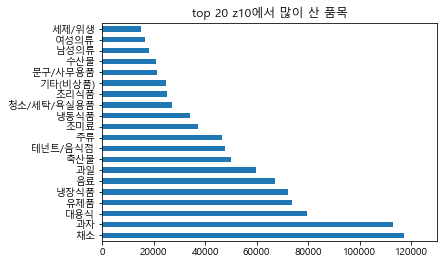

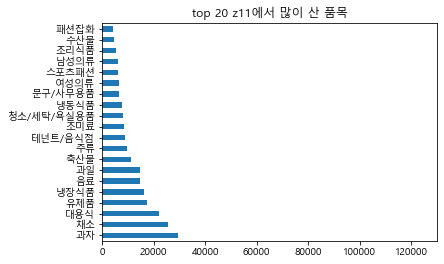

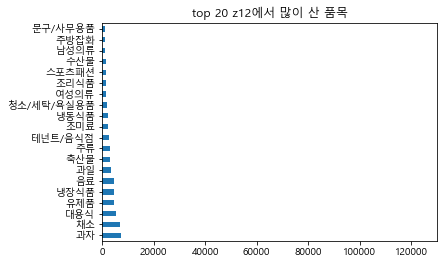

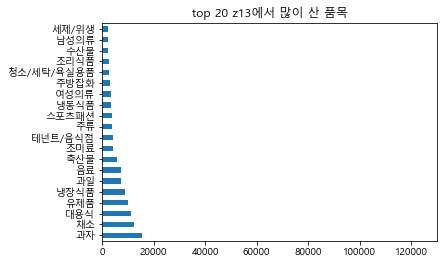

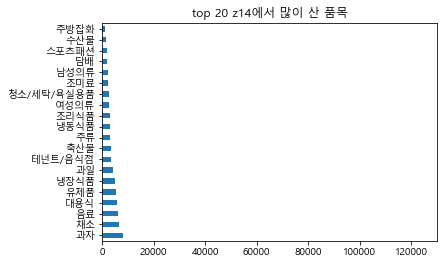

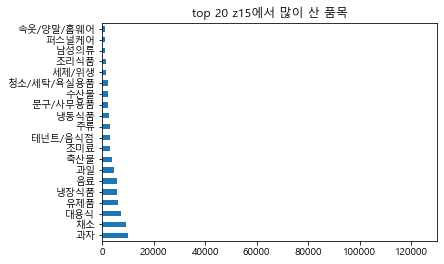

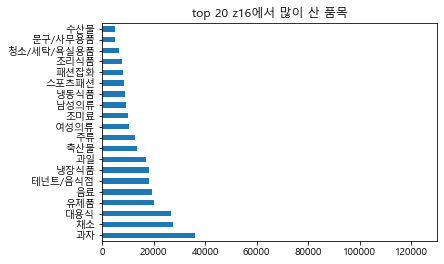

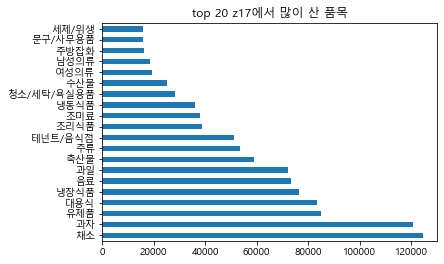

In [158]:
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]:
    d_ = hlv[(hlv["C_ZON_HLV"]== i)]
    d_['CLAC_HLV_NM'].value_counts().nlargest(20).plot(kind='barh')
    plt.title("top 20 z"+str(i)+"에서 많이 산 품목")
    plt.xlim([0, 130000])
    plt.show()

그냥 다 비슷

## 중분류 대분류 품목 파악

In [59]:
clac = pd.read_sql("select * from LPAY_PD_CLAC" , con = connect)
list = ['스낵류','식당','국산과일','요구르트','잎채소','우유','비스킷류','두부/콩나물류','청소용품','맥주']
for i in list:
    a = clac['CLAC_MCLS_NM']==i
    print('중분류: '+i)
    print(clac[a],'\n')
# 중분류 파악

중분류: 스낵류
       PD_C  PD_NM CLAC_HLV_NM CLAC_MCLS_NM
227  PD0228   감자스낵          과자          스낵류
228  PD0229  고구마스낵          과자          스낵류
229  PD0230  옥수수스낵          과자          스낵류
230  PD0231    쌀스낵          과자          스낵류
231  PD0232   일반스낵          과자          스낵류
232  PD0233    영양바          과자          스낵류
233  PD0234     팝콘          과자          스낵류
234  PD0235   과일스낵          과자          스낵류 

중분류: 식당
        PD_C  PD_NM CLAC_HLV_NM CLAC_MCLS_NM
1682  PD1683     한식     테넌트/음식점           식당
1683  PD1684     양식     테넌트/음식점           식당
1684  PD1685     일식     테넌트/음식점           식당
1685  PD1686     중식     테넌트/음식점           식당
1686  PD1687   동남아식     테넌트/음식점           식당
1687  PD1688     분식     테넌트/음식점           식당
1688  PD1689    디저트     테넌트/음식점           식당
1689  PD1690   베이커리     테넌트/음식점           식당
1690  PD1691     뷔페     테넌트/음식점           식당
1691  PD1692  커피/음료     테넌트/음식점           식당
1692  PD1693  패스트푸드     테넌트/음식점           식당 

중분류: 국산과일
       PD_C    PD_NM CLAC_HLV_NM 

c:\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [60]:
clac = pd.read_sql("select * from LPAY_PD_CLAC" , con = connect)
list = ['과자','채소','대용식','유제품','냉장식품','음료','과일','축산물','주류','테넌트/음식점']
for i in list:
    a = a = clac['CLAC_HLV_NM']==i
    print('대분류: '+i)
    print(clac[a],'\n')
# 대분류 파악

대분류: 과자
       PD_C       PD_NM CLAC_HLV_NM CLAC_MCLS_NM
206  PD0207         맛밤류          과자     간식/안주형과자
207  PD0208      안주용육포류          과자     간식/안주형과자
208  PD0209  기타간식/안주형과자          과자     간식/안주형과자
209  PD0210        과자세트          과자         과자세트
210  PD0211      전통과자세트          과자         과자세트
211  PD0212     사탕/캔디세트          과자         과자세트
212  PD0213       초콜릿세트          과자         과자세트
213  PD0214         일반껌          과자            껌
214  PD0215        기능성껌          과자            껌
215  PD0216         풍선껌          과자            껌
216  PD0217         크래커          과자         비스킷류
217  PD0218          쿠키          과자         비스킷류
218  PD0219          샌드          과자         비스킷류
219  PD0220        스틱과자          과자         비스킷류
220  PD0221        하드캔디          과자        사탕/캔디
221  PD0222       소프트캔디          과자        사탕/캔디
222  PD0223          젤리          과자        사탕/캔디
223  PD0224          양갱          과자        사탕/캔디
224  PD0225         캐러멜          과자        사탕/캔디
225  PD0226 

c:\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


# 점포(S_ZON_HLV)

In [160]:
s_zone= result[(result['S_ZON_HLV']>0)]
s_zone=s_zone[['MA_FEM_DV','AGES','C_ZON_HLV','S_ZON_HLV','CHNL_DV']]
s_zone['C_ZON_HLV'].astype('int')
s_zone

,MA_FEM_DV,AGES,C_ZON_HLV,S_ZON_HLV,CHNL_DV
0,0,50,17,10,1
1,0,40,13,13,1
2,0,50,17,10,1
3,0,50,17,10,1
4,0,50,17,10,1
...,...,...,...,...,...
248244,0,20,10,17,1
248245,0,20,10,17,1
248246,0,30,12,14,2
248247,1,20,17,17,2


## 성별 연령별 많이 이용하는 점포종류 파악

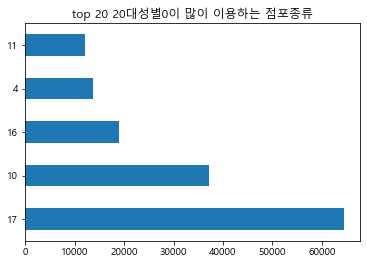

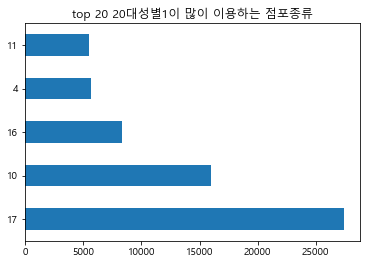

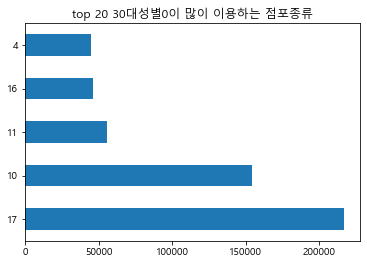

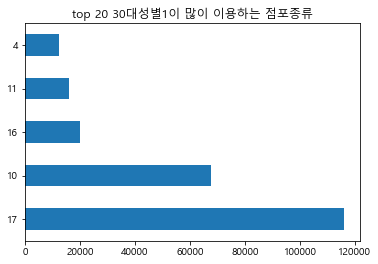

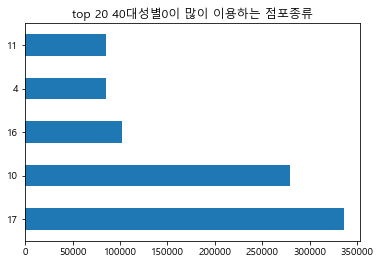

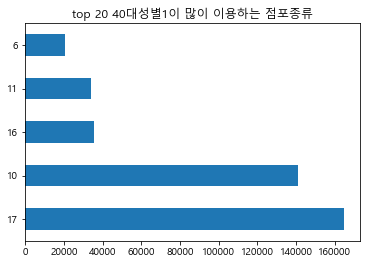

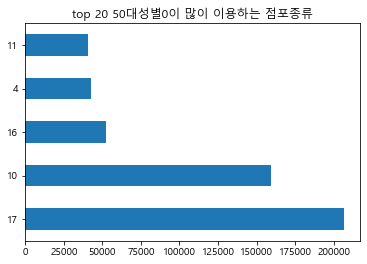

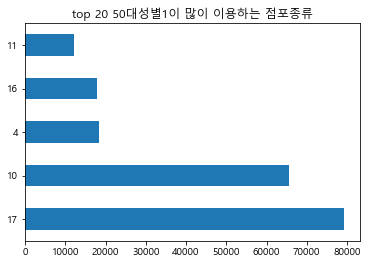

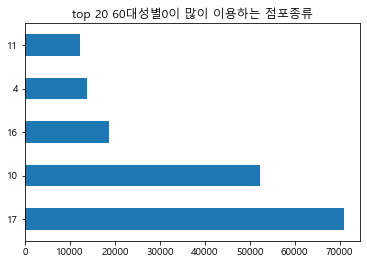

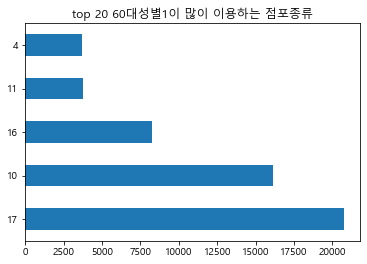

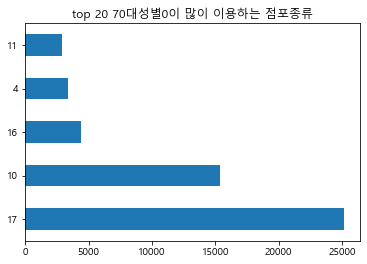

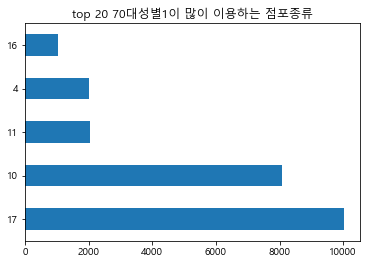

In [161]:
for i in [20,30,40,50,60,70]:
    for r in [0,1]:
        s_ = s_zone[(s_zone["AGES"]== i)& (s_zone['MA_FEM_DV']==r)]
        s_['S_ZON_HLV'].value_counts().nlargest(5).plot(kind='barh')
        plt.title("top 20 "+str(i)+"대"+"성별"+str(r)+"이 많이 이용하는 점포종류")
        plt.show()

 모든 성별, 연령대의 사람들이 z17의 점포를 가장많이 이용하고 두번째로는 z10의 점포를 가장많이 이용한다.

## 거주지별 많이 이용하는 점포종류

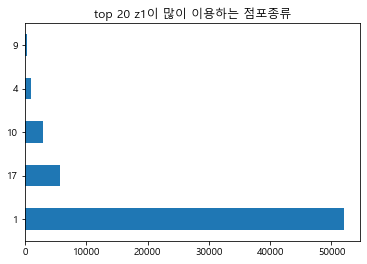

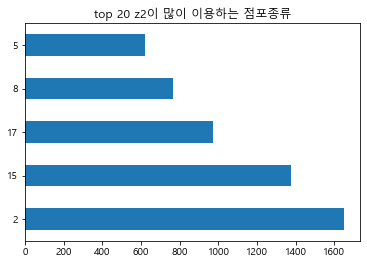

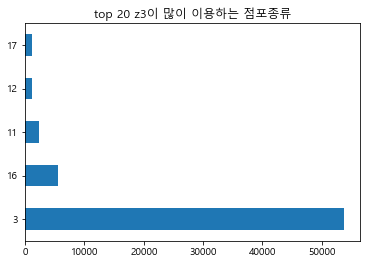

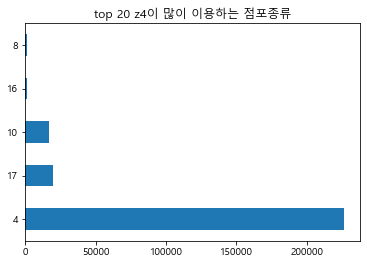

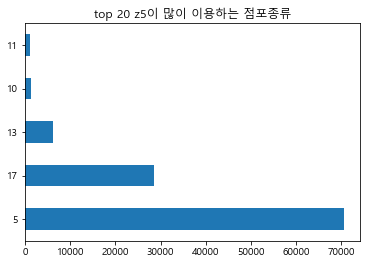

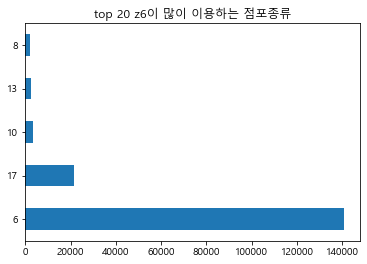

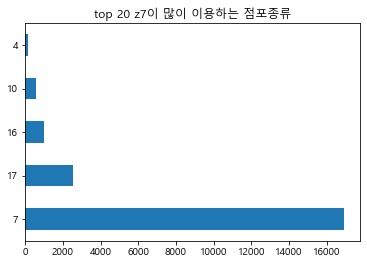

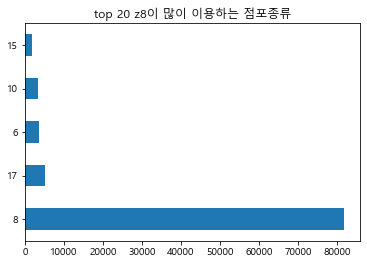

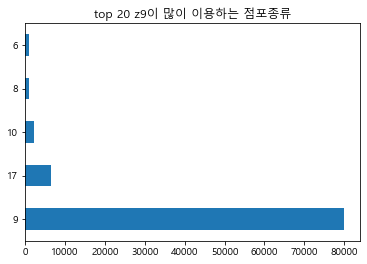

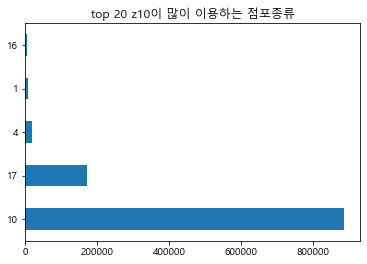

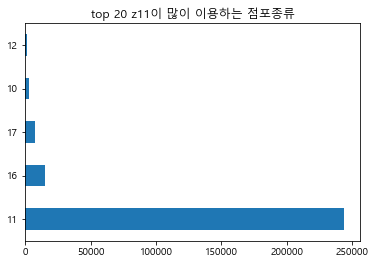

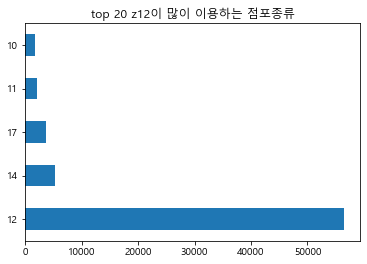

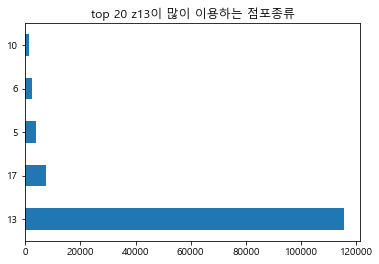

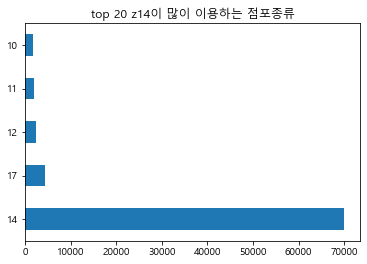

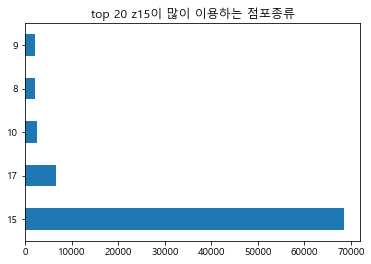

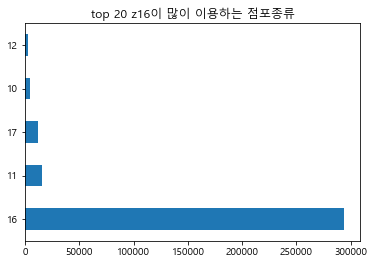

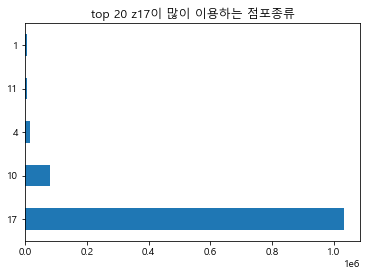

In [162]:
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]:
    c_ = s_zone[(s_zone["C_ZON_HLV"]== i)]
    c_['S_ZON_HLV'].value_counts().nlargest(5).plot(kind='barh')
    plt.title("top 20 z"+str(i)+"이 많이 이용하는 점포종류")
    plt.show()

 모든 사람들이 본인이 거주한 지역 근처의 점포를 많이 이용한다.<br> 본인의 지역 이외에 가장많이 이용하는 점포를 보면은 주로 z17이다.<br> 모든 사람들이 z17을 이용을 많이하다보니 그런거 같다. 

## 온오프라인별 많이 이용하는 점포종류

In [163]:
off2 = s_zone[(s_zone['CHNL_DV']==1)]
on2 = s_zone[(s_zone['CHNL_DV']==2)]

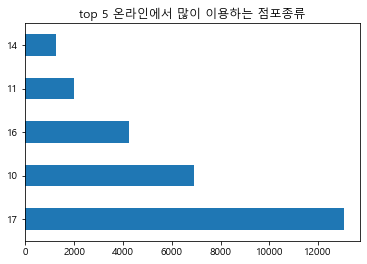

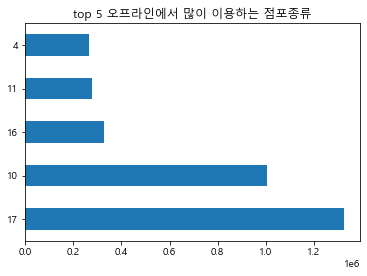

In [168]:
on2['S_ZON_HLV'].value_counts().nlargest(5).plot(kind='barh')
plt.title("top 5 온라인에서 많이 이용하는 점포종류")
plt.show()
off2['S_ZON_HLV'].value_counts().nlargest(5).plot(kind='barh')
plt.title("top 5 오프라인에서 많이 이용하는 점포종류")
plt.show()

 온오프라인 둘다 z17,10,16,11을 순으로 가장많이 이용하며 온라인 같은경우는 Z14 오프라인 같은경우는 Z04를 많이 이용한다.